<a href="https://www.kaggle.com/code/sethu123123/bcg-forage-task-2?scriptVersionId=140694721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Required libraries

**client_data.csv**

* id = client company identifier
* activity_new = category of the company’s activity
*channel_sales = code of the sales channel
*cons_12m = electricity consumption of the past 12 months
*cons_gas_12m = gas consumption of the past 12 months
*cons_last_month = electricity consumption of the last month
*date_activ = date of activation of the contract
*date_end = registered date of the end of the contract
*date_modif_prod = date of the last modification of the product
*date_renewal = date of the next contract renewal
*forecast_cons_12m = forecasted electricity consumption for next 12 months
*forecast_cons_year = forecasted electricity consumption for the next calendar year
*forecast_discount_energy = forecasted value of current discount
*forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
*forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
*forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
*forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
*has_gas = indicated if client is also a gas client
*imp_cons = current paid consumption
*margin_gross_pow_ele = gross margin on power subscription
*margin_net_pow_ele = net margin on power subscription
*nb_prod_act = number of active products and services
*net_margin = total net margin
*num_years_antig = antiquity of the client (in number of years)
*origin_up = code of the electricity campaign the customer first subscribed to
*pow_max = subscribed power
*churn = has the client churned over the next 3 months




**price_data.csv**


* id = client company identifier
* price_date = reference date
* price_off_peak_var = price of energy for the 1st period (off peak)
* price_peak_var = price of energy for the 2nd period (peak)
* price_mid_peak_var = price of energy for the 3rd period (mid peak)
* price_off_peak_fix = price of power for the 1st period (off peak)
* price_peak_fix = price of power for the 2nd period (peak)
* price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
plt.rcParams['axes.facecolor']=(0.72, 0.807, 0.898)
pd.set_option('display.max_columns', 50)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
client=pd.read_csv('/kaggle/input/bcgtask/client.csv')

In [3]:
price=pd.read_csv("/kaggle/input/bcgtask/price.csv")

In [4]:
df=pd.merge(client,price,on='id')

In [5]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
date=['date_activ','date_end','date_modif_prod','date_renewal','price_date']
for i in date:
  df[i]=pd.to_datetime(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

In [10]:
df.shape

(175149, 33)

In [11]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [12]:
df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [13]:
df.shape

(175149, 33)

<Axes: >

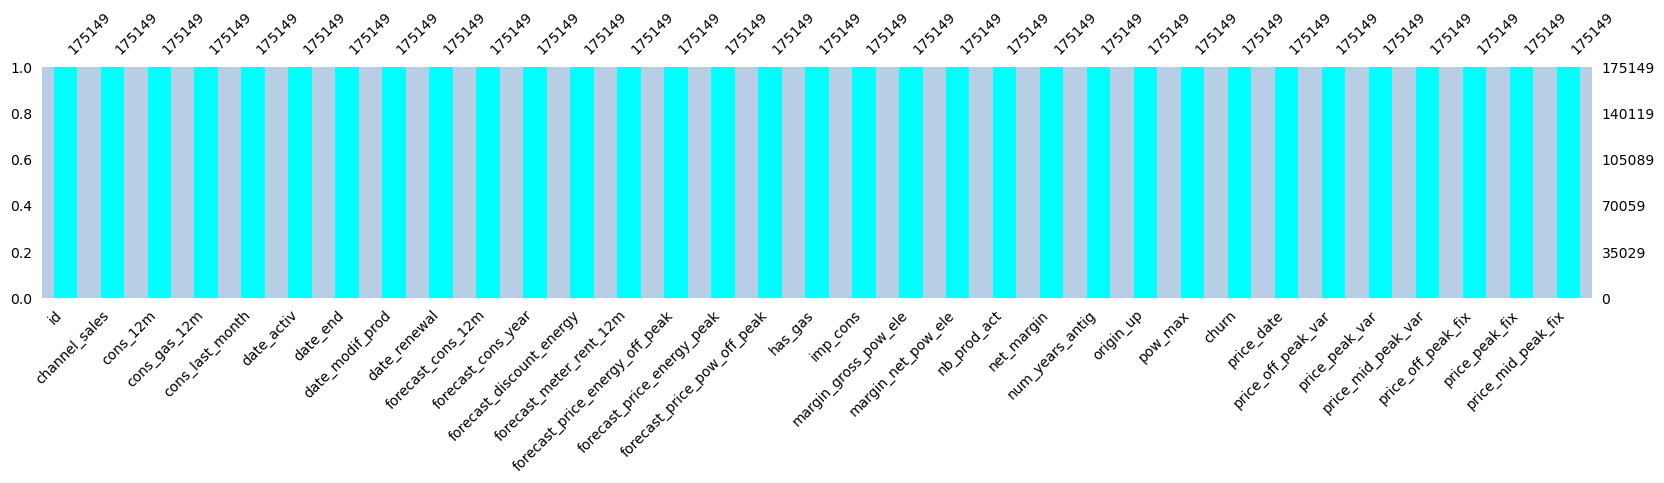

In [14]:
mn.bar(df,figsize=(20,3),fontsize=10,color='cyan')

In [15]:
#first half of int and float columns
df[['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele']].describe().round(3)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele
count,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000
mean,159260.579,28080.718,16095.518,1868.344,1399.782,0.967,63.075,0.137,0.050,43.130,152.790,24.567,24.564
std,573541.331,162940.034,64376.742,2387.560,3248.331,5.109,66.144,0.025,0.049,4.487,341.427,20.234,20.234
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5674.000,0.000,0.000,494.980,0.000,0.000,16.180,0.116,0.000,40.607,0.000,14.280,14.280
50%,14115.000,0.000,792.000,1112.610,314.000,0.000,18.790,0.143,0.084,44.311,37.390,21.640,21.640
75%,40763.000,0.000,3383.000,2400.350,1745.000,0.000,131.030,0.146,0.099,44.311,193.990,29.880,29.880
max,6207104.000,4154590.000,771203.000,82902.830,175375.000,30.000,599.310,0.274,0.196,59.266,15042.790,374.640,374.640


In [16]:
#2nd half of int and float columns
df[['nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'churn',
 'price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix']].describe().round(3)

,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000,175149.000
mean,1.292,189.245,4.998,18.135,0.097,0.142,0.052,0.028,42.929,9.459,6.096
std,0.710,311.847,1.612,13.536,0.296,0.023,0.050,0.036,4.621,12.133,7.822
min,1.000,0.000,1.000,3.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,50.710,4.000,12.500,0.000,0.127,0.000,0.000,40.729,0.000,0.000
50%,1.000,112.500,5.000,13.856,0.000,0.147,0.084,0.000,44.267,0.000,0.000
75%,1.000,243.000,6.000,19.180,0.000,0.152,0.102,0.073,44.445,24.340,16.226
max,32.000,24570.650,13.000,320.000,1.000,0.281,0.230,0.114,59.445,36.491,17.458


In [17]:
df.describe(include=['object'])

,id,channel_sales,has_gas,origin_up
count,175149,175149,175149,175149
unique,14606,8,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
freq,12,80971,143364,85086


In [18]:
#kurtosis and skewness

  # Skewness > 0: Positively skewed (tail on the right)
  # Skewness < 0: Negatively skewed (tail on the left)
  #Skewness = 0: Symmetric distribution

  #Kurtosis > 3: Leptokurtic (more peaked than a normal distribution, with heavier tails)
  #Kurtosis < 3: Platykurtic (less peaked than a normal distribution, with lighter tails)
  #Kurtosis = 3: Mesokurtic (similar peakedness to a normal distribution)

skew=df.select_dtypes(include=['int','float']).skew().to_frame().reset_index()
skew.columns=['col_names','Skewness']
kurt=df.select_dtypes(include=['int','float']).kurtosis().to_frame().reset_index()
kurt.columns=['col_names','kurtosis']
a=pd.merge(skew,kurt,on='col_names')
a.index.name='sno'
a

,col_names,Skewness,kurtosis
sno,,,
0,cons_12m,5.996313,42.669832
1,cons_gas_12m,9.601588,126.427130
2,cons_last_month,6.389957,47.732548
3,forecast_cons_12m,7.159049,147.470752
4,forecast_cons_year,16.587522,653.463987
5,forecast_discount_energy,5.153648,24.836366
6,forecast_meter_rent_12m,1.503670,4.483410
7,forecast_price_energy_off_peak,-0.120054,8.363671
8,forecast_price_energy_peak,-0.014138,-1.890489


From the above table inferences most of the features are right skewed and followed by heavy tailed distributions

# **EDA**

In [19]:
churn=df['churn'].value_counts().to_frame().reset_index()
churn.columns=['Status','Churn']
churn.at[0,'Status']='NO'   # replacing 0 with NO
churn['Status'][1]='Yes'    # replaceing 1 with Yes

#converting into churn status percentage for Churn column in the dataframe

churn['Churn']=churn['Churn'].apply(lambda x: (x/churn['Churn'].sum())*100)
churn

/tmp/ipykernel_32/478852479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Status'][1]='Yes'    # replaceing 1 with Yes


,Status,Churn
0,NO,90.292265
1,Yes,9.707735


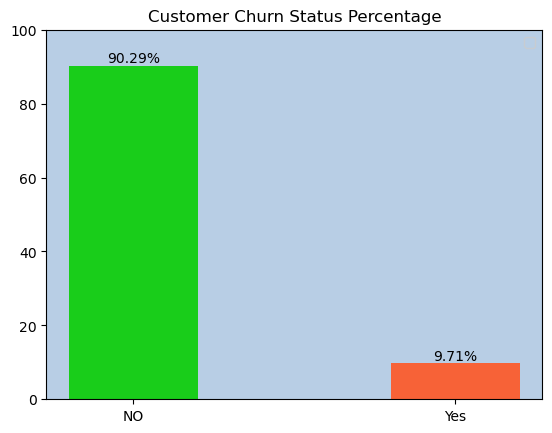

In [20]:
plt.bar(x='Status',height='Churn',data=churn,color=[(0.031, 0.803, 0.015),(1, 0.337, 0.141)],alpha=0.9,width=0.4)
plt.rcParams['axes.facecolor'] = (0.72, 0.807, 0.898)
for index, value in enumerate(churn['Churn']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom') #va-vertical alignment for text label, ha- horizontal alignment for text label

plt.ylim(0,100)
plt.title('Customer Churn Status Percentage')
plt.legend()
plt.show()

From the above bar graph we can easily infer that,

✈Total no of Customers not churned = 91.39%

✈Total no of Customers actually Churned = 9.71%

In [21]:
#Sales channel

sc=df[['id','channel_sales','churn']]
sc=sc.groupby(['channel_sales','churn'])['id'].count().unstack().fillna(0)
sc.columns=['No','Yes']
for i in sc.columns:
  sc[f'{i}%'] = sc[i] / (sc['No'] + sc['Yes']) * 100

sc

,No,Yes,No%,Yes%
channel_sales,,,,
MISSING,41290.0,3394.0,92.404440,7.595560
epumfxlbckeskwekxbiuasklxalciiuu,36.0,0.0,100.000000,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,9813.0,899.0,91.607543,8.392457
fixdbufsefwooaasfcxdxadsiekoceaa,24.0,0.0,100.000000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,71149.0,9822.0,87.869731,12.130269
lmkebamcaaclubfxadlmueccxoimlema,20871.0,1234.0,94.417553,5.582447
sddiedcslfslkckwlfkdpoeeailfpeds,131.0,0.0,100.000000,0.000000
usilxuppasemubllopkaafesmlibmsdf,14832.0,1654.0,89.967245,10.032755


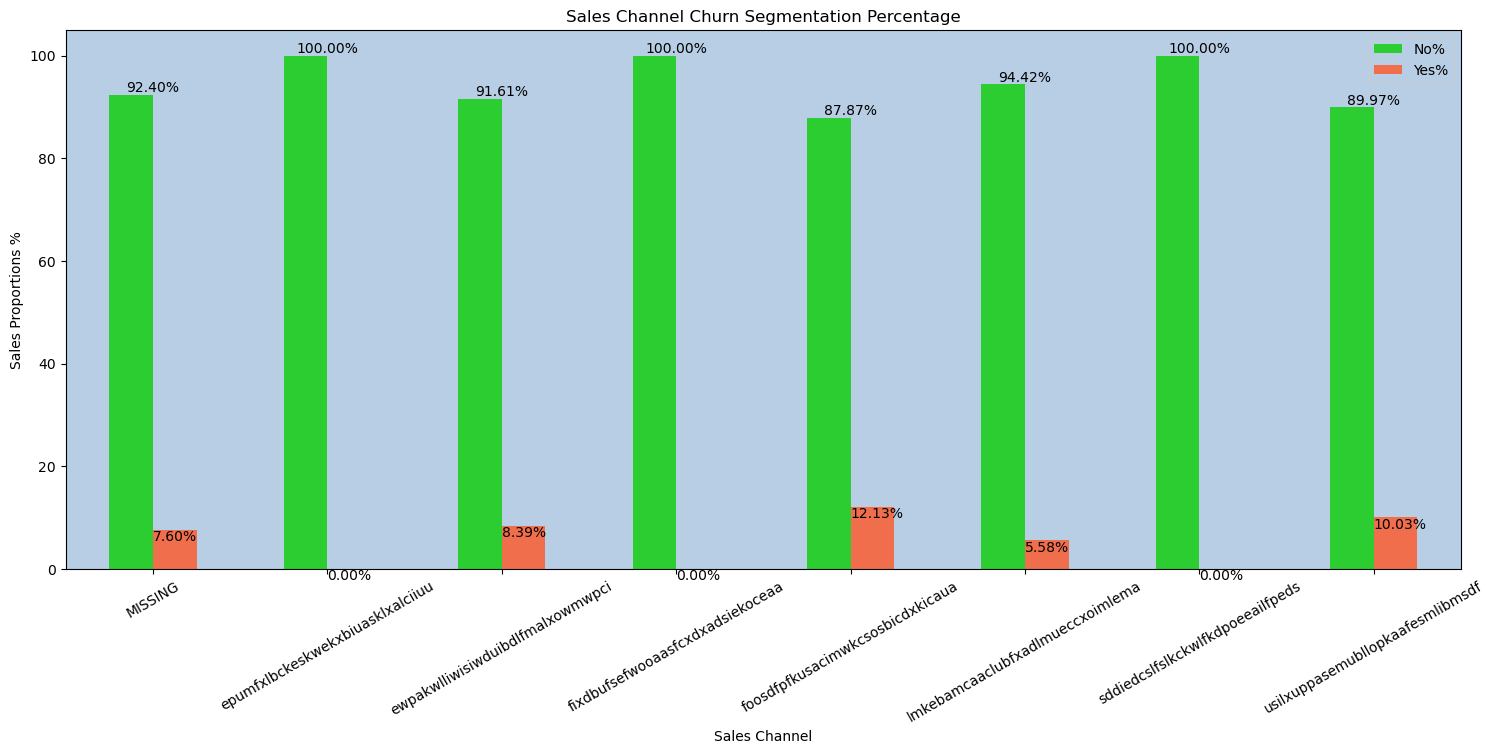

In [22]:
sc[['No%','Yes%']].plot(kind='bar',stacked=False,color=[(0.031, 0.803, 0.015),(1, 0.337, 0.141)],alpha=0.8,figsize=(18,7),width=0.5)
plt.rcParams['axes.facecolor'] = (0.72, 0.807, 0.898)
for index,value in enumerate(sc['No%']):
  plt.text(index,value,f'{value:.2f}%',ha='center',va='bottom')#'top', 'bottom', 'center', 'baseline', 'center_baseline' va
for index,value in enumerate(sc['Yes%']):
  plt.text(index,value,f'{value:.2f}%',ha='left',va='top')#'center', 'right', 'left' ha
plt.title('Sales Channel Churn Segmentation Percentage')
plt.xlabel('Sales Channel')
plt.ylabel('Sales Proportions %')
plt.xticks(rotation=30)
plt.show()

In Sales channel "MISSING" values  is presented and it contains data about 44,648 values.In later part this will be important for modelling purposes.

In [23]:
#consumption

cons=df[['id','cons_12m', 'cons_gas_12m', 'cons_last_month','has_gas','imp_cons','churn']]
cons.head(4)

,id,cons_12m,cons_gas_12m,cons_last_month,has_gas,imp_cons,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,t,0.0,1
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,t,0.0,1
2,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,t,0.0,1
3,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,t,0.0,1


In [24]:
def plotting(dataframe, col):

  condf=pd.DataFrame({'C_Retained': dataframe[dataframe['churn']==0][col],
                      'C_Churned': dataframe[dataframe['churn']==1][col]})

  fig,axs=plt.subplots(1,2,figsize=(30,10))

  c1,x1=np.histogram(dataframe[dataframe['churn']==0][col],20)
  c2,x2=np.histogram(dataframe[dataframe['churn']==1][col],20)

  condf['C_Retained'].plot(kind='hist',ax=axs[0],xticks=x1,alpha=0.95,color=(0.031, 0.803, 0.015))
  axs[0].set_facecolor((0.72, 0.807, 0.898))
  axs[0].set_title(f"Customers Retained Based on {col}",fontsize=20)
  axs[0].set_xlabel(f"Retained: {col}",fontsize=18)
  axs[0].set_xticklabels([f"{t1:.2f}" for t1 in axs[0].get_xticks()],rotation=45,fontsize=15)
  axs[0].tick_params(axis='y',labelsize=15)


  condf['C_Churned'].plot(kind='hist',ax=axs[1],xticks=x2,color=(1, 0.337, 0.141),alpha=0.95)
  axs[1].set_title(f"Customers Churned Based on {col}",fontsize=20)
  axs[1].set_facecolor((0.72, 0.807, 0.898))
  axs[1].set_xlabel(f"Churned: {col}",fontsize=18)
  axs[1].set_xticklabels([f"{t2:.2f}" for t2 in axs[1].get_xticks()],rotation=45,fontsize=15)
  axs[1].tick_params(axis='y',labelsize=15)



  plt.subplots_adjust(wspace=0.3)
  plt.tight_layout()
  plt.show()

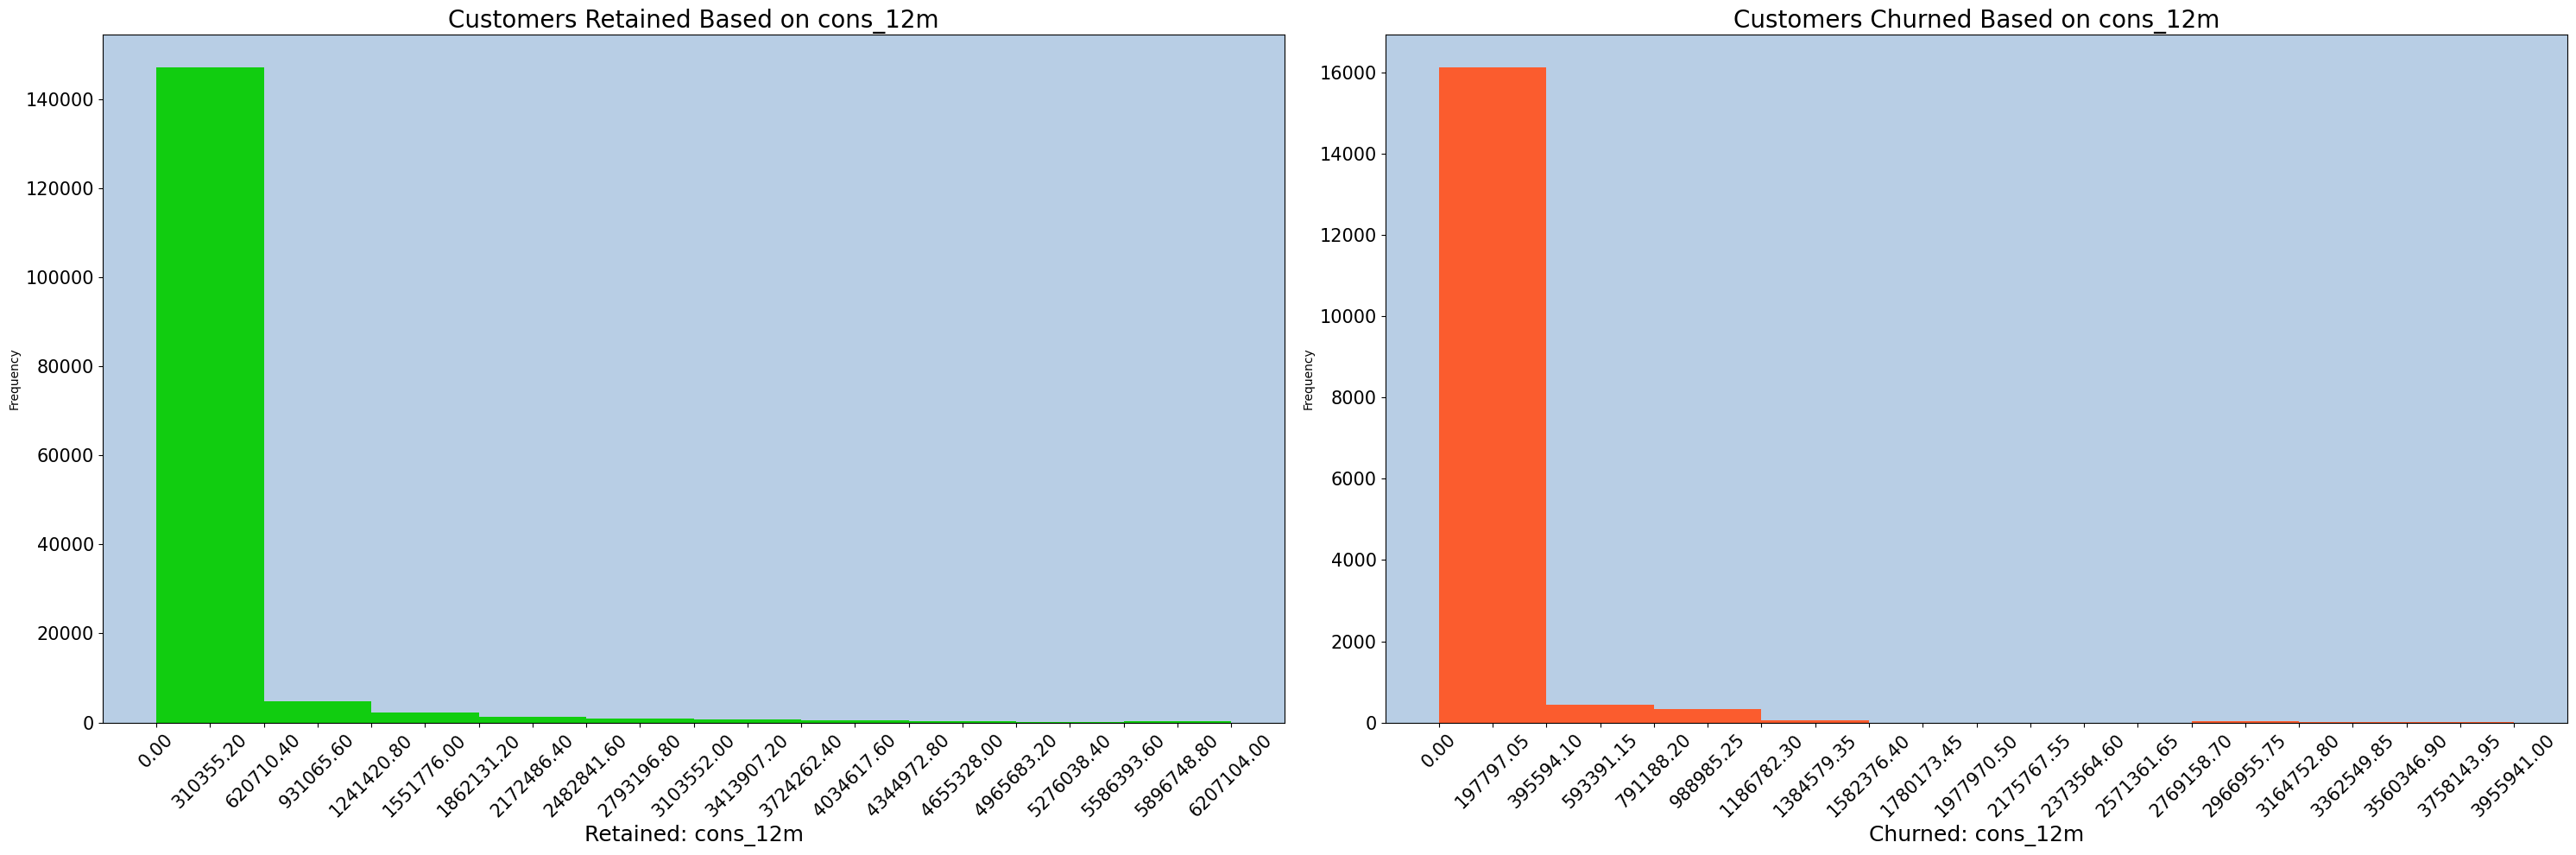

In [25]:
plotting(cons, 'cons_12m')

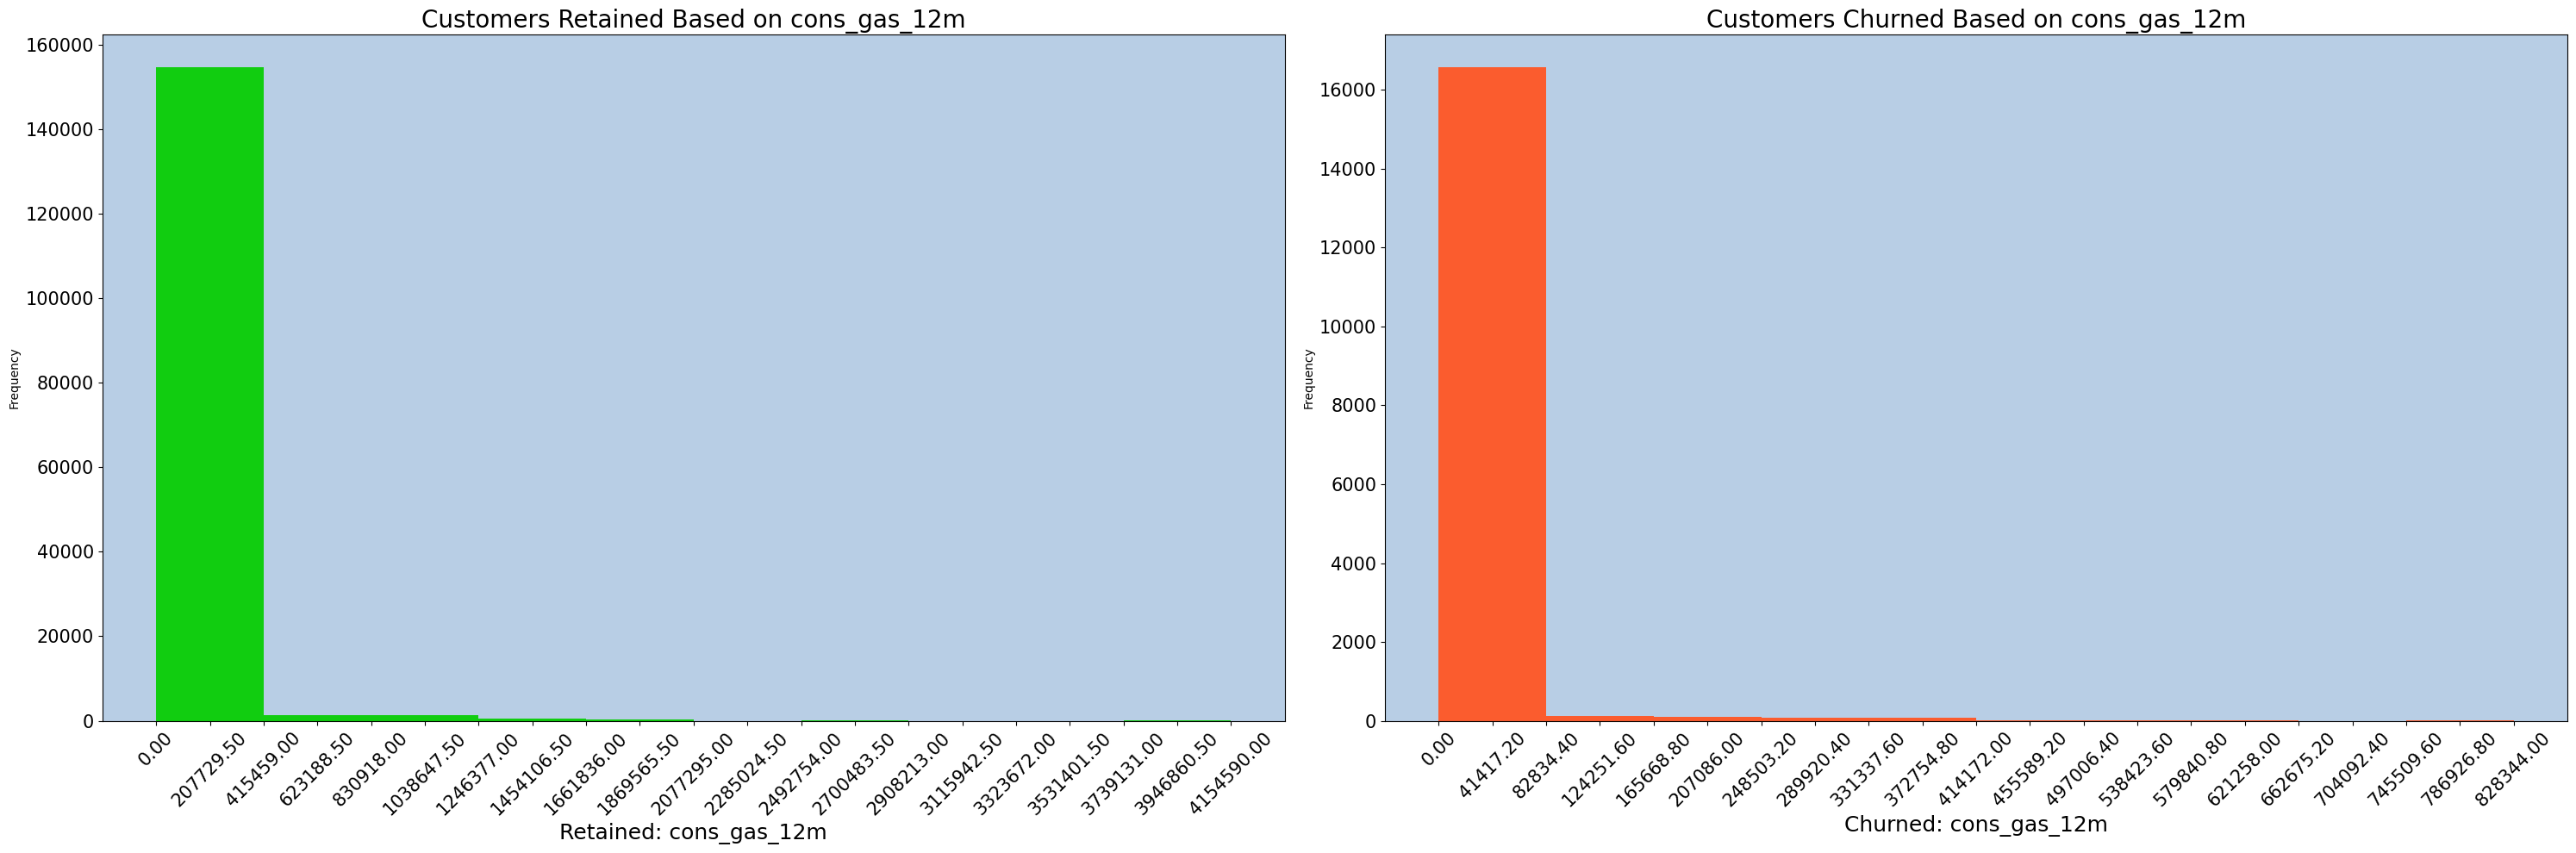

In [26]:
plotting(cons, 'cons_gas_12m')

Consumption of Gas for past 12 months

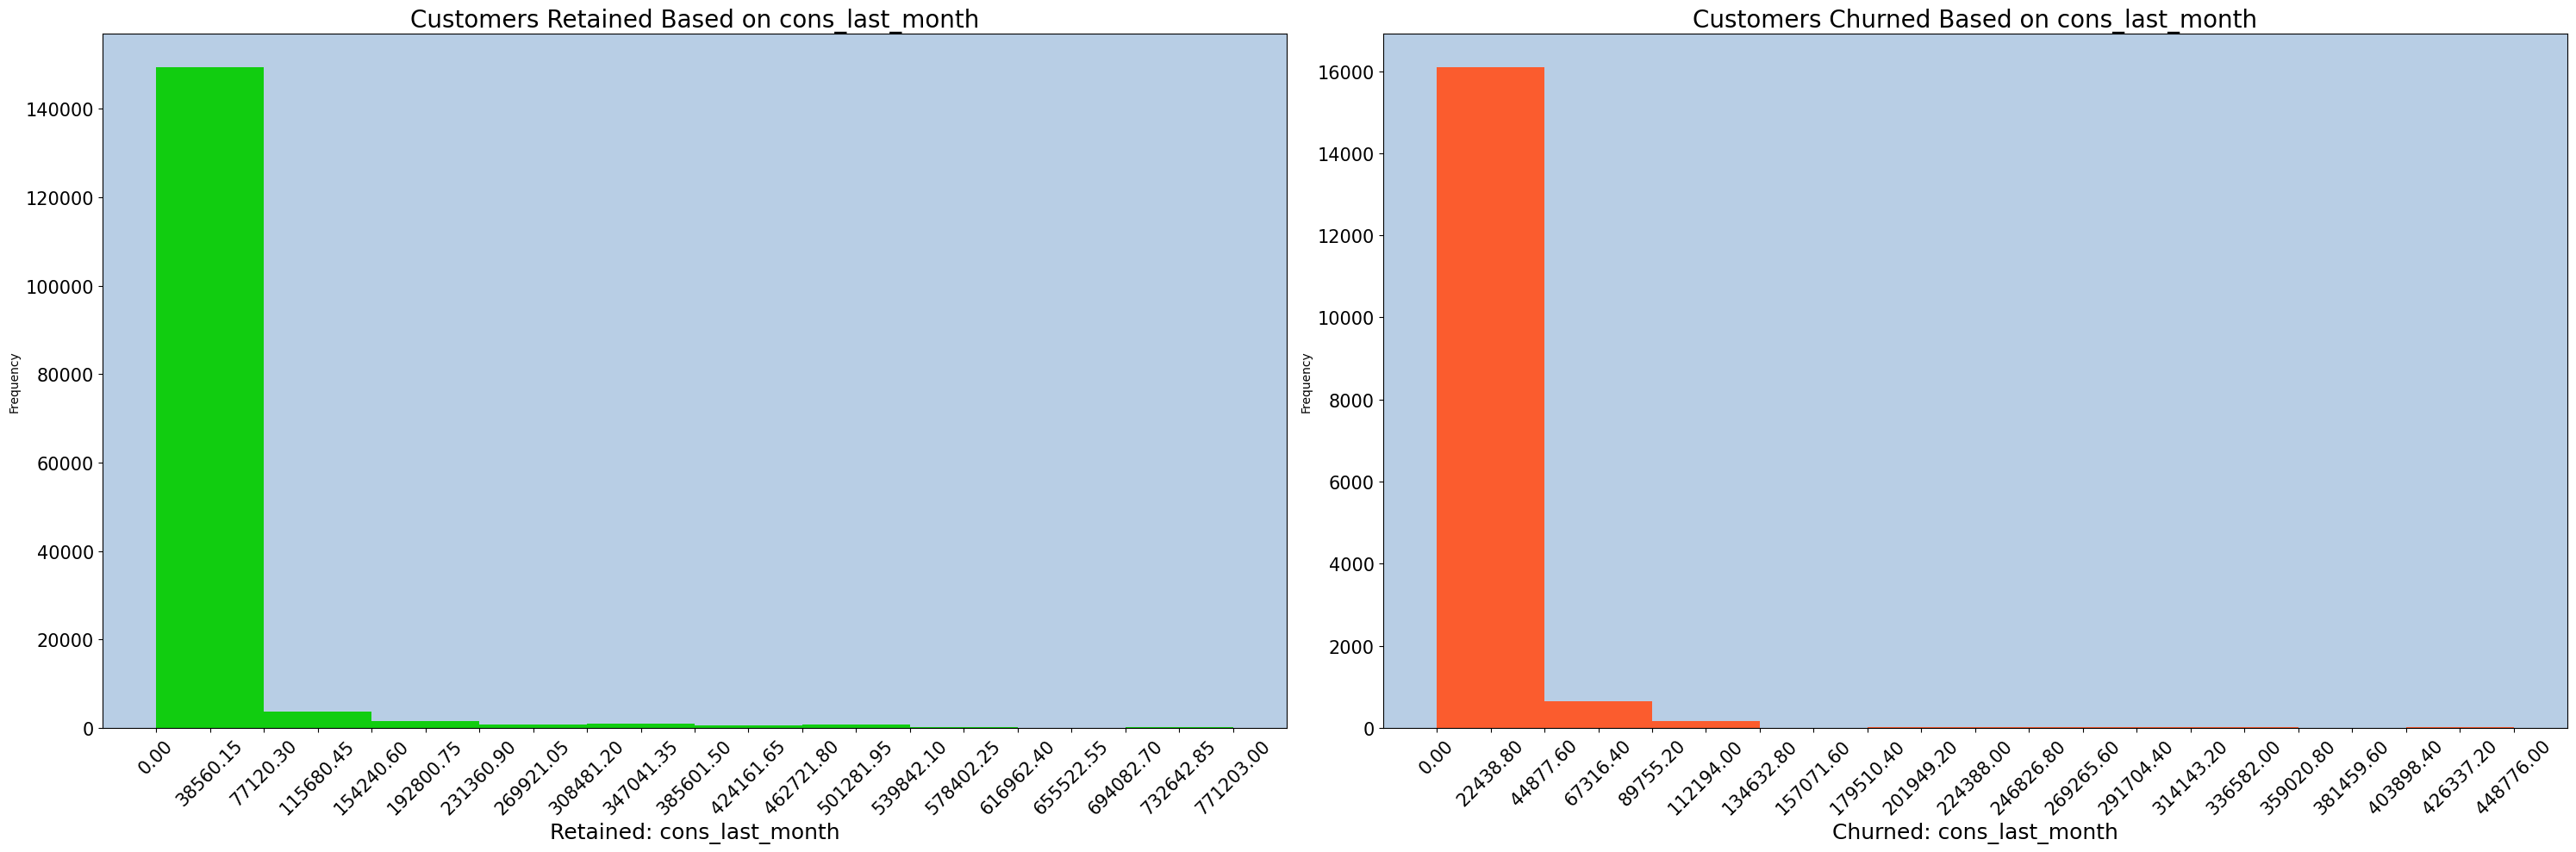

In [27]:
plotting(cons, 'cons_last_month')

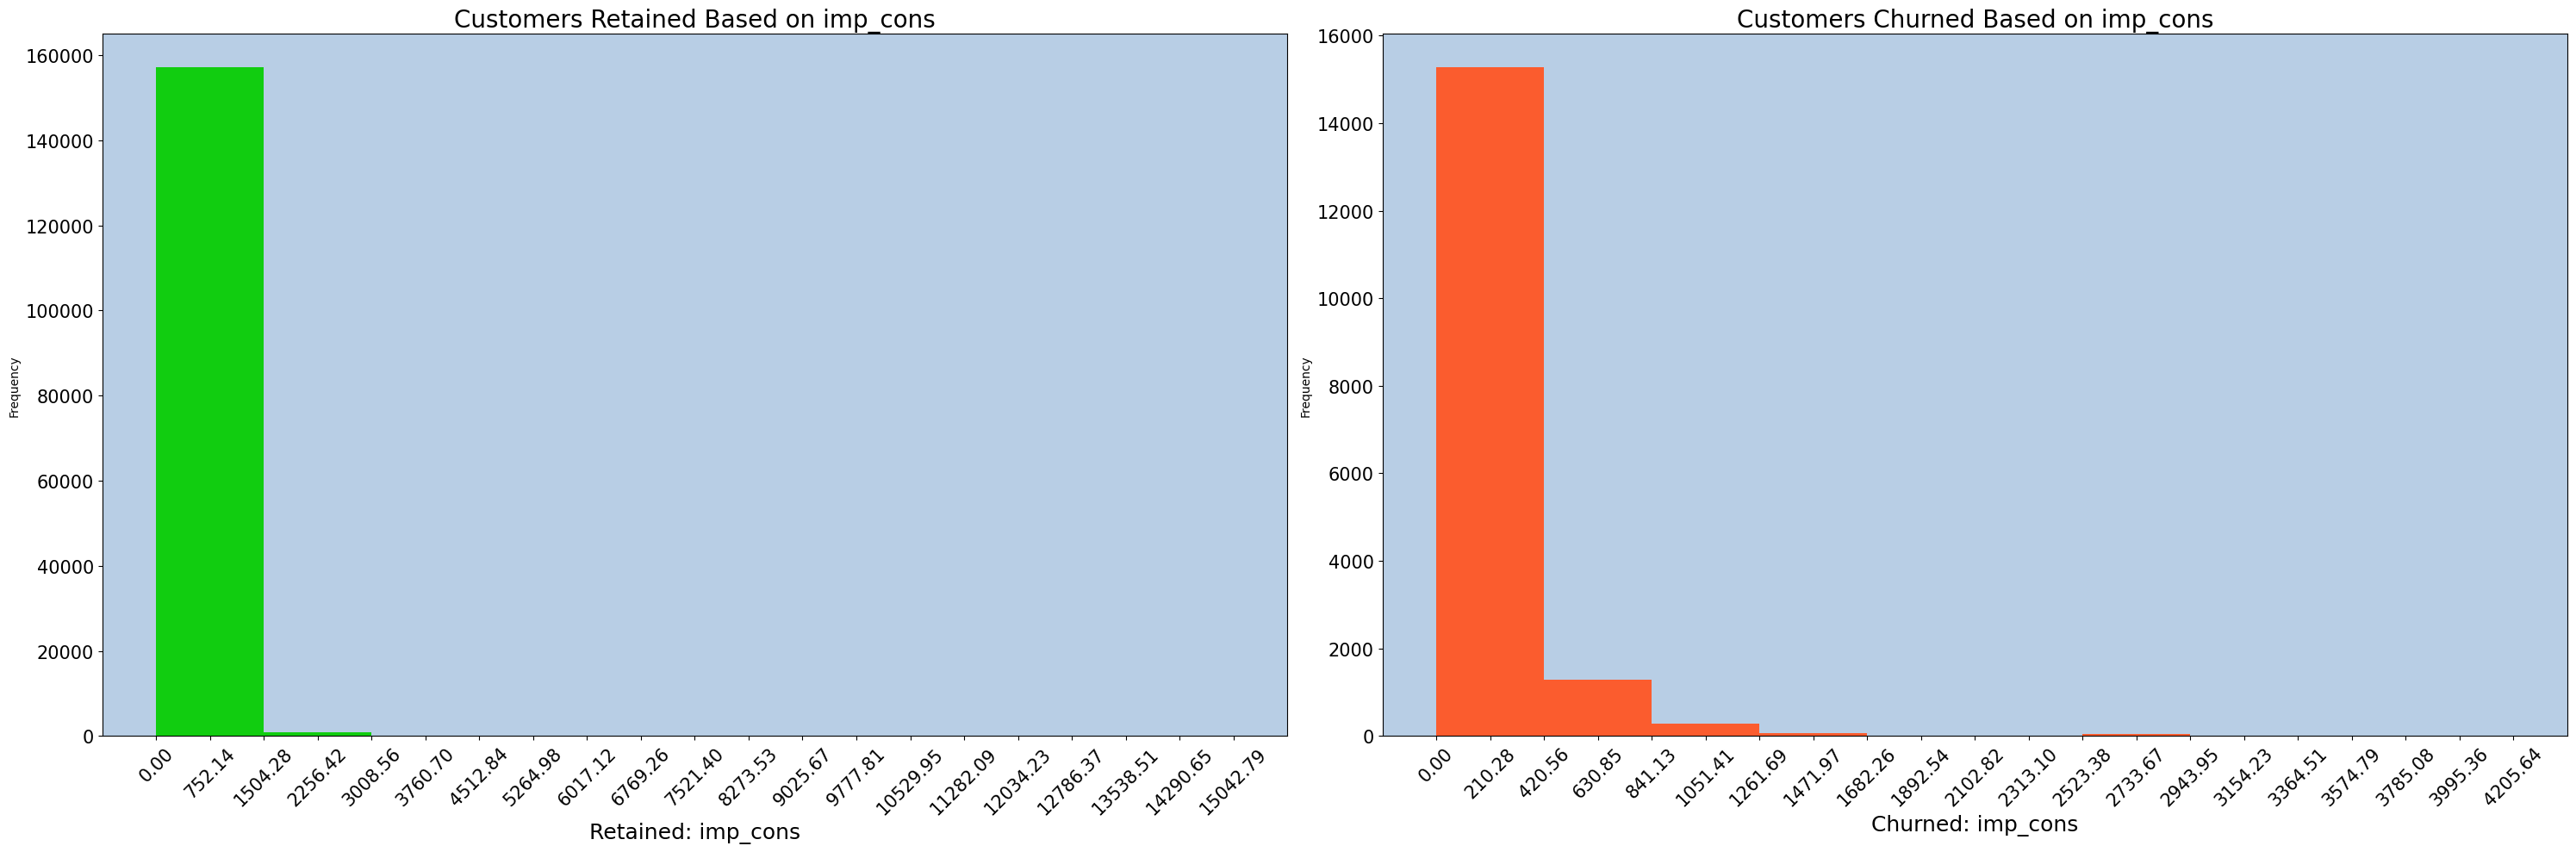

In [28]:
plotting(cons, 'imp_cons')

From the above visuals features such as 'cons_12m', 'cons_gas_12m', 'cons_last_month','has_gas','imp_cons' having right skewed and heavly tailed distribution pattern

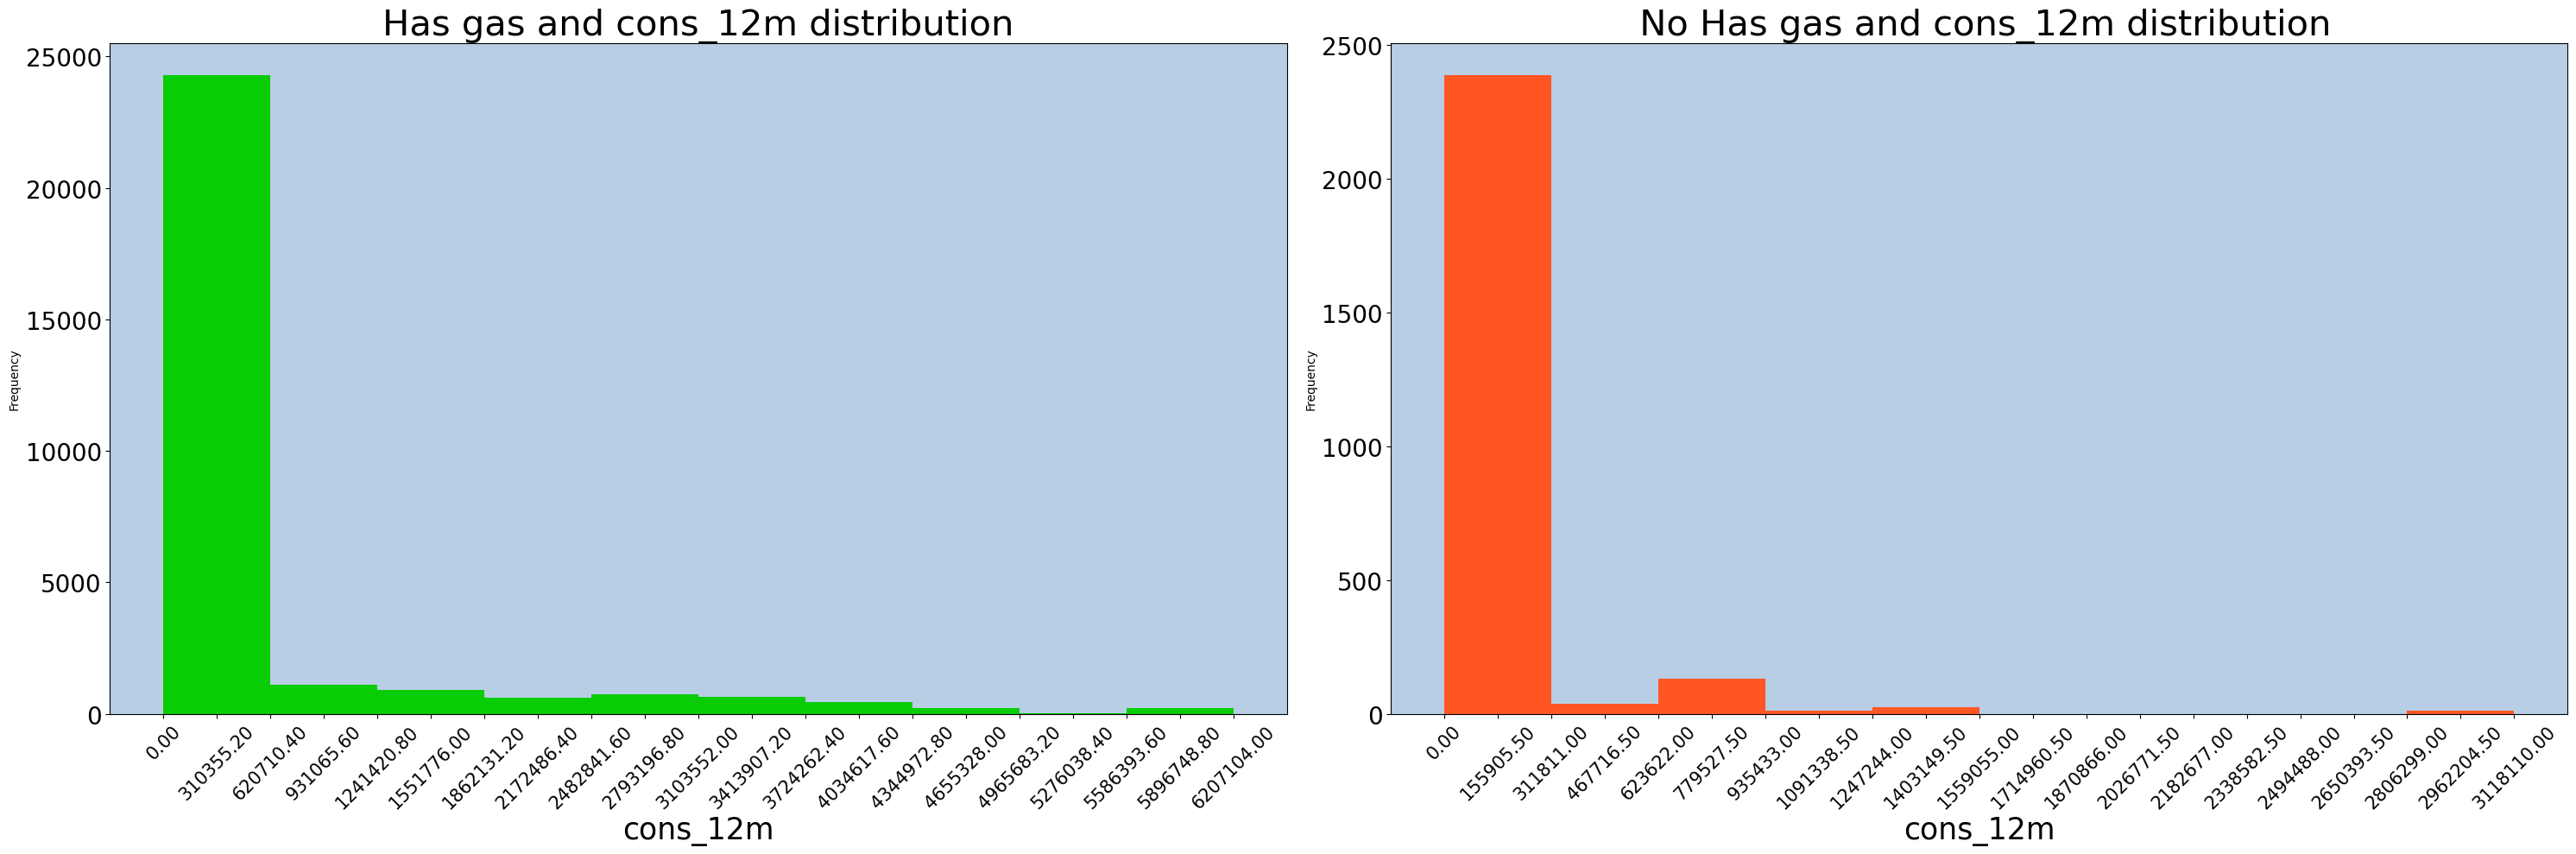

In [29]:
fig,axs=plt.subplots(1,2,figsize=(30,10))

count1,bin1=np.histogram(cons[(cons['has_gas']=='t')& (cons['churn']==0)]['cons_12m'],20)
count2,bin2=np.histogram(cons[(cons['has_gas']=='t')& (cons['churn']==1)]['cons_12m'],20)

cons[(cons['has_gas']=='t')& (cons['churn']==0)]['cons_12m'].plot(kind='hist',ax=axs[0],xticks=bin1,color=(0.031, 0.803, 0.015))
axs[0].set_facecolor((0.72, 0.807, 0.898))
axs[0].set_title('Has gas and cons_12m distribution',fontsize=30)
axs[0].set_xlabel('cons_12m',fontsize=25)
axs[0].set_xticklabels([f"{tick:.2f}" for tick in axs[0].get_xticks()],rotation=45,fontsize=15)
axs[0].tick_params(axis='y',labelsize=20)


cons[(cons['has_gas']=='t')& (cons['churn']==1)]['cons_12m'].plot(kind='hist',ax=axs[1],xticks=bin2,color=(1, 0.337, 0.141),alpha=1)
axs[1].set_facecolor((0.72, 0.807, 0.898))
axs[1].set_title(' No Has gas and cons_12m distribution',fontsize=30)
axs[1].set_xlabel('cons_12m',fontsize=25)
axs[1].set_xticklabels([f"{tic:.2f}" for tic in axs[1].get_xticks()], rotation=45,fontsize=15)
axs[1].tick_params(axis='y',labelsize=20)


plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.show()

* The above histogram depicts that Customers who own Gas contract retained  mostly closer to 25000 and lies more in  bin range between 0 to 620710.

* But right side histogram belongs to the Customers who actually churned their Gas contract closer to 2500 and lies more in the bin range of 0 to 311811. And some few humps are founded on their tails.

/tmp/ipykernel_32/3871391435.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels([f"{t00}"for t00 in axs[0,0].get_xticks()],fontsize=15)
/tmp/ipykernel_32/3871391435.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels([f"{t01}"for t01 in axs[0,0].get_xticks()],fontsize=15)
/tmp/ipykernel_32/3871391435.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels([f"{t10}" for t10 in axs[1,0].get_xticks()],fontsize=15)
/tmp/ipykernel_32/3871391435.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels([f"{t11}" for t11 in axs[1,1].get_xticks()],fontsize=15)


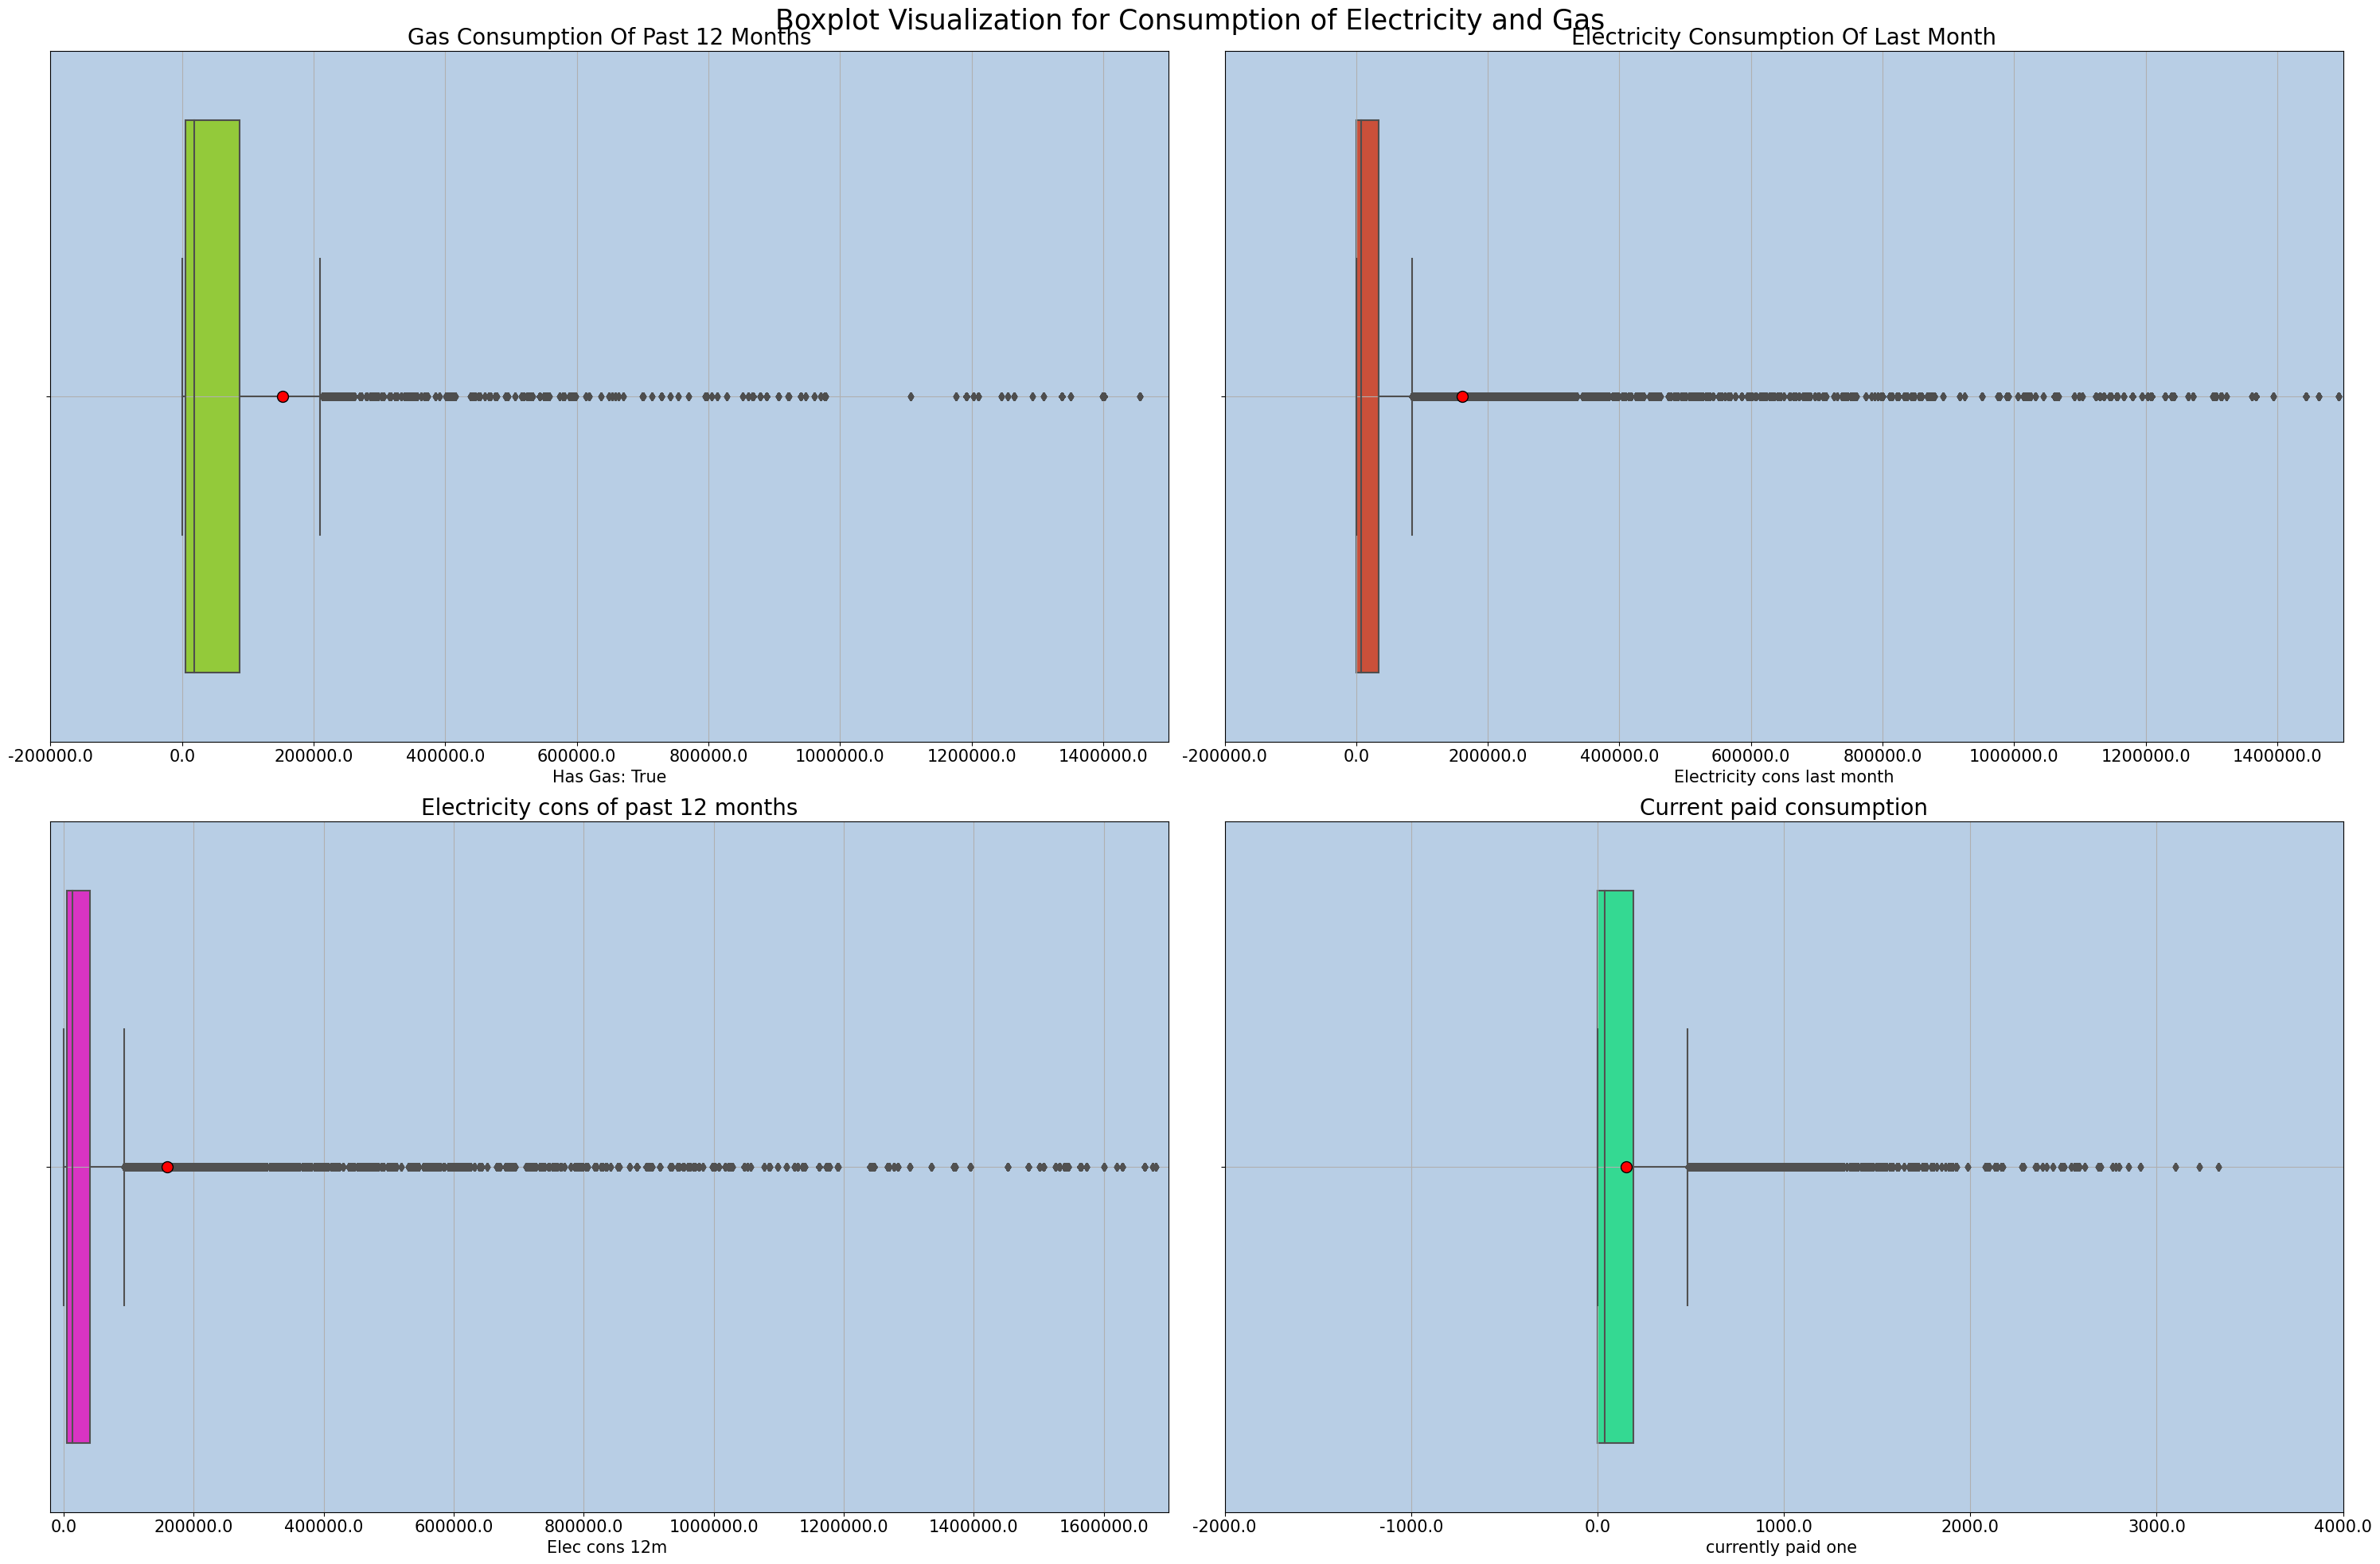

In [72]:
fig,axs=plt.subplots(2,2,figsize=(30,20))
plt.rcParams['axes.facecolor']=(0.72, 0.807, 0.898)
fig.suptitle('Boxplot Visualization for Consumption of Electricity and Gas', fontsize=25)


#hasgas True consgas 12m
sns.boxplot(x=cons[cons['has_gas']=='t']['cons_gas_12m'],ax=axs[0,0],color=(0.6, 0.886, 0.133),showmeans=True,meanprops={'marker':'o',
                                                                                                                       'markerfacecolor':'red',
                                                                                                                       'markeredgecolor':'black',
                                                                                                                       'markersize':'10'})
axs[0,0].set_xlim(-200000,1500000)
axs[0,0].set_xlabel('Has Gas: True',fontsize=15)
axs[0,0].set_title(f"Gas Consumption Of Past 12 Months",fontsize=20)
axs[0,0].set_xticklabels([f"{t00}"for t00 in axs[0,0].get_xticks()],fontsize=15)
axs[0,0].grid()


#Electricity cons of last months
sns.boxplot(x=cons['cons_last_month'],ax=axs[0,1],color=(0.886, 0.247, 0.133),showmeans=True,meanprops={'marker':'o',
                                                                                                                         'markerfacecolor':'red',
                                                                                                                         'markeredgecolor':'black',
                                                                                                                         'markersize':'10'})
axs[0,1].set_xlim(-20000,150000)
axs[0,1].set_xlabel('Electricity cons last month',fontsize=15)
axs[0,1].set_title(f"Electricity Consumption Of Last Month",fontsize=20)
axs[0,1].set_xticklabels([f"{t01}"for t01 in axs[0,0].get_xticks()],fontsize=15)
axs[0,1].grid()


#Electricity cons of past 12 months
sns.boxplot(x=cons['cons_12m'],ax=axs[1,0],color=(0.960, 0.098, 0.843),showmeans=True,meanprops={'marker':'o','markerfacecolor':'red',
                                                                                                 'markeredgecolor':'black','markersize':'10'})
axs[1,0].set_xlabel('Elec cons 12m ',fontsize=15)
axs[1,0].set_xlim(-20000,1700000)
axs[1,0].set_title(f"Electricity cons of past 12 months",fontsize=20)
axs[1,0].set_xticklabels([f"{t10}" for t10 in axs[1,0].get_xticks()],fontsize=15)
axs[1,0].grid()

#Current paid consumption
sns.boxplot(x=cons['imp_cons'],ax=axs[1,1],color=(0.098, 0.960, 0.588),showmeans=True,meanprops={'marker':'o','markerfacecolor':'red',
                                                                                                 'markeredgecolor':'black','markersize':'10'})
axs[1,1].set_xlabel('currently paid one ',fontsize=15)
axs[1,1].set_xlim(-2000,4000)
axs[1,1].set_title(f"Current paid consumption",fontsize=20)
axs[1,1].set_xticklabels([f"{t11}" for t11 in axs[1,1].get_xticks()],fontsize=15)
axs[1,1].grid()


plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.tight_layout()
plt.show()

The Boxplot visuals for the feature contains more number of outliers in the data. It wil be dealed later part

In [31]:
forecast=df[['churn','has_gas',
          'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m',
          'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak']]


forecast['churn']=forecast['churn'].map({1:'Churned',0:'Retained'})
forecast.head()

/tmp/ipykernel_32/1094931643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['churn']=forecast['churn'].map({1:'Churned',0:'Retained'})


,churn,has_gas,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
0,Churned,t,0.0,0,0.0,1.78,0.114481,0.098142,40.606701
1,Churned,t,0.0,0,0.0,1.78,0.114481,0.098142,40.606701
2,Churned,t,0.0,0,0.0,1.78,0.114481,0.098142,40.606701
3,Churned,t,0.0,0,0.0,1.78,0.114481,0.098142,40.606701
4,Churned,t,0.0,0,0.0,1.78,0.114481,0.098142,40.606701


In [32]:
def displott(data, col,lim):
  plt.figure(figsize=(20,13))
  sns.displot(data, x=col, kde=True,hue='churn',col='has_gas',height=6,aspect=2,
              palette=[(1, 0.337, 0.141),(0.031, 0.803, 0.015)])
  plt.suptitle(f"{col} Distribution",fontsize=20)
  plt.xlim(lim)
  plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1300 with 0 Axes>

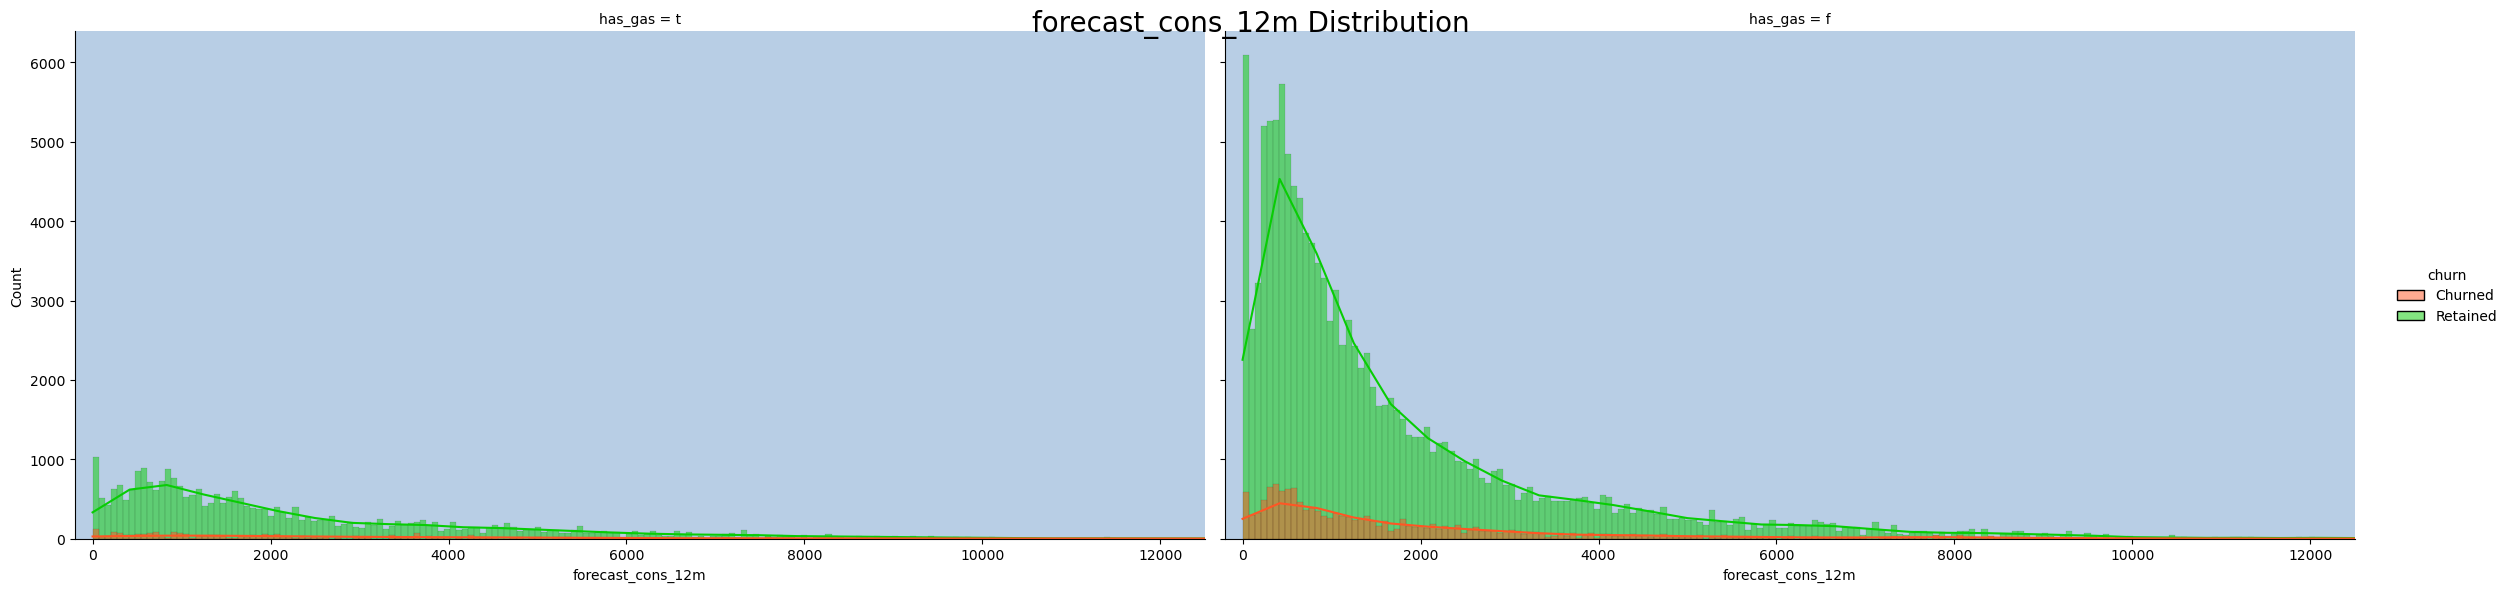

In [33]:
displott(forecast,'forecast_cons_12m',(-200,12500))

* The people who dont own the Gas contract Churned a lot when compared to the people who own the Gas contract

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1300 with 0 Axes>

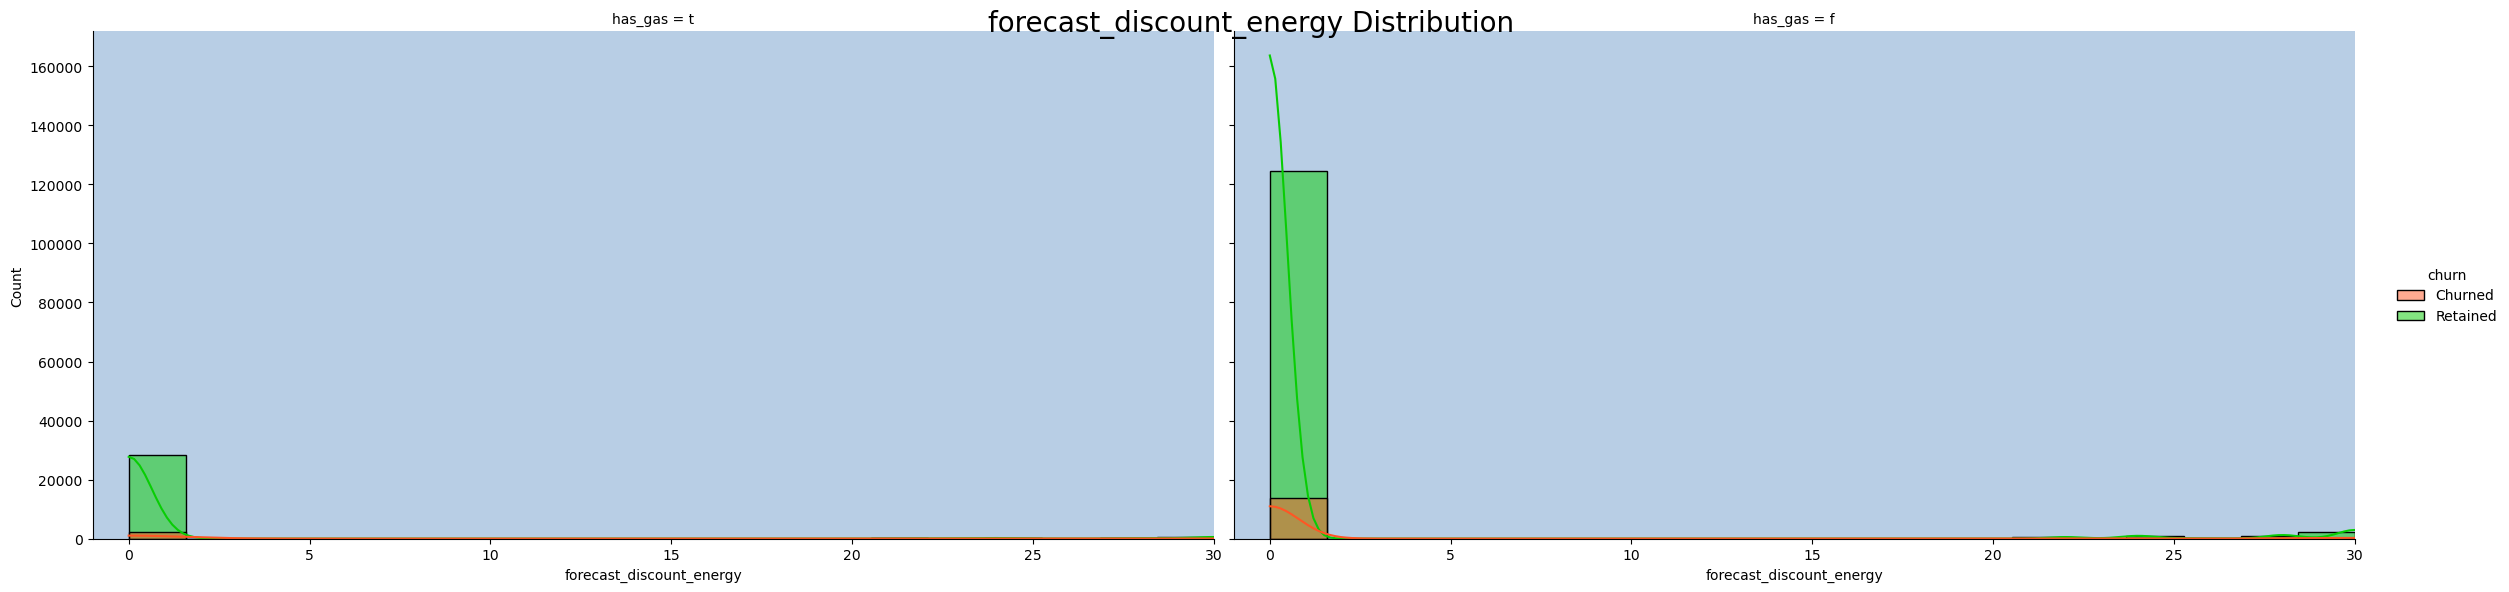

In [34]:
 displott(forecast,  'forecast_discount_energy',(-1,30))

For the Forecasted value of current discount for the pople own Gas contract have the much less churn rate.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1300 with 0 Axes>

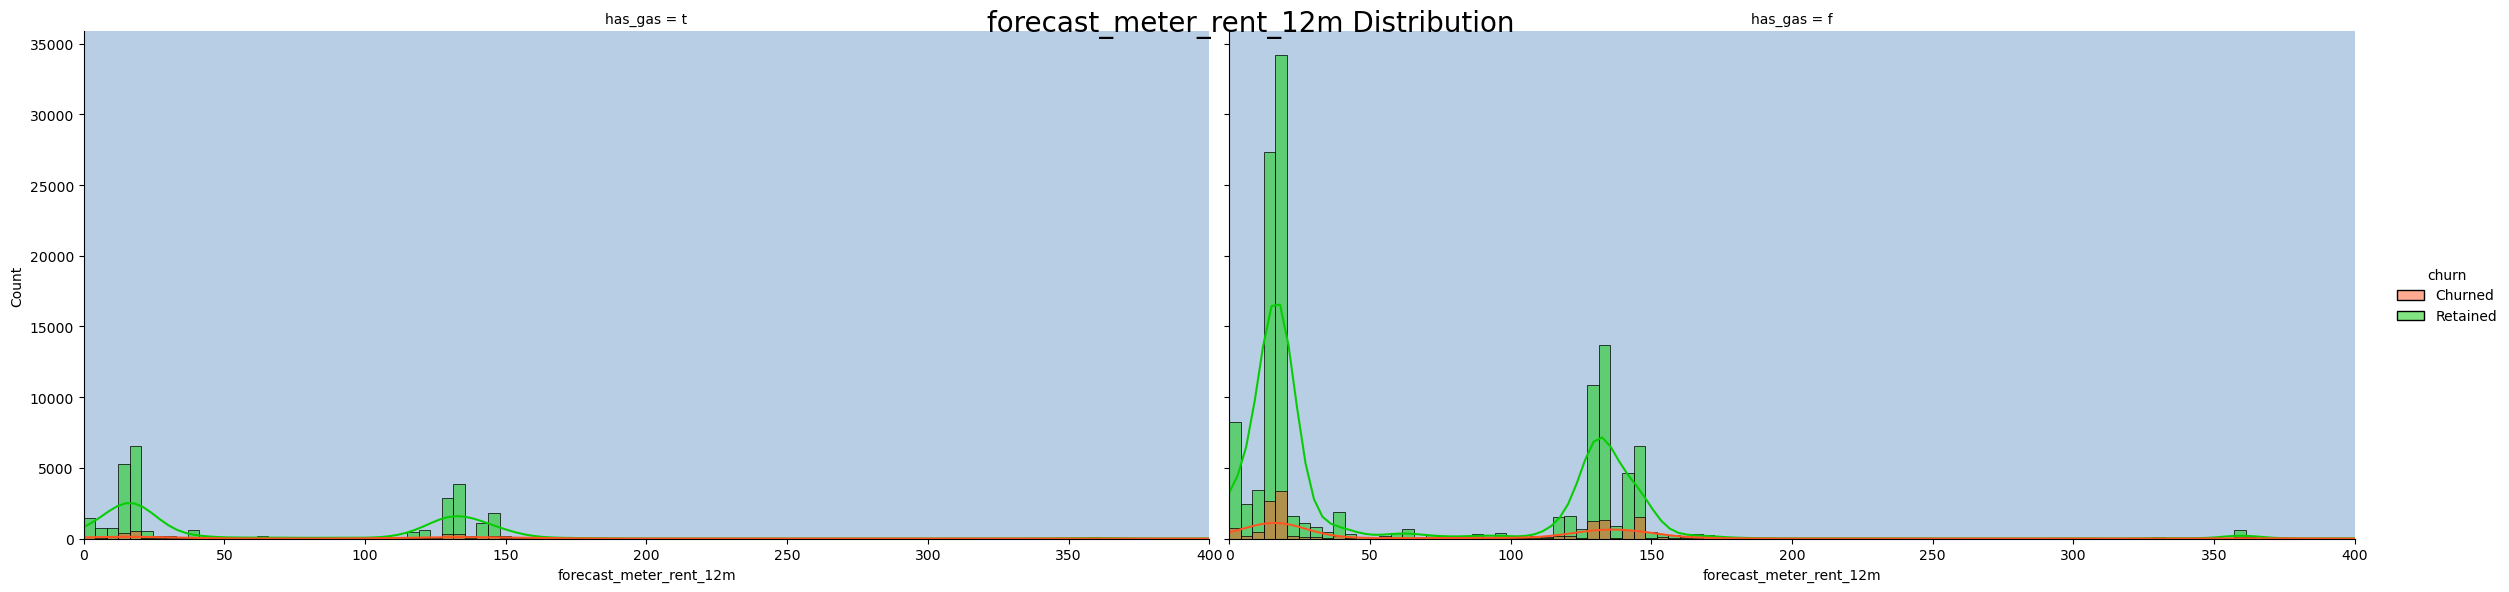

In [35]:
 displott(forecast, 'forecast_meter_rent_12m',(0,400))

Forecasted bill of meter rental for the next 12 months with Gas contract likely to be less churned from the analysis of the visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1300 with 0 Axes>

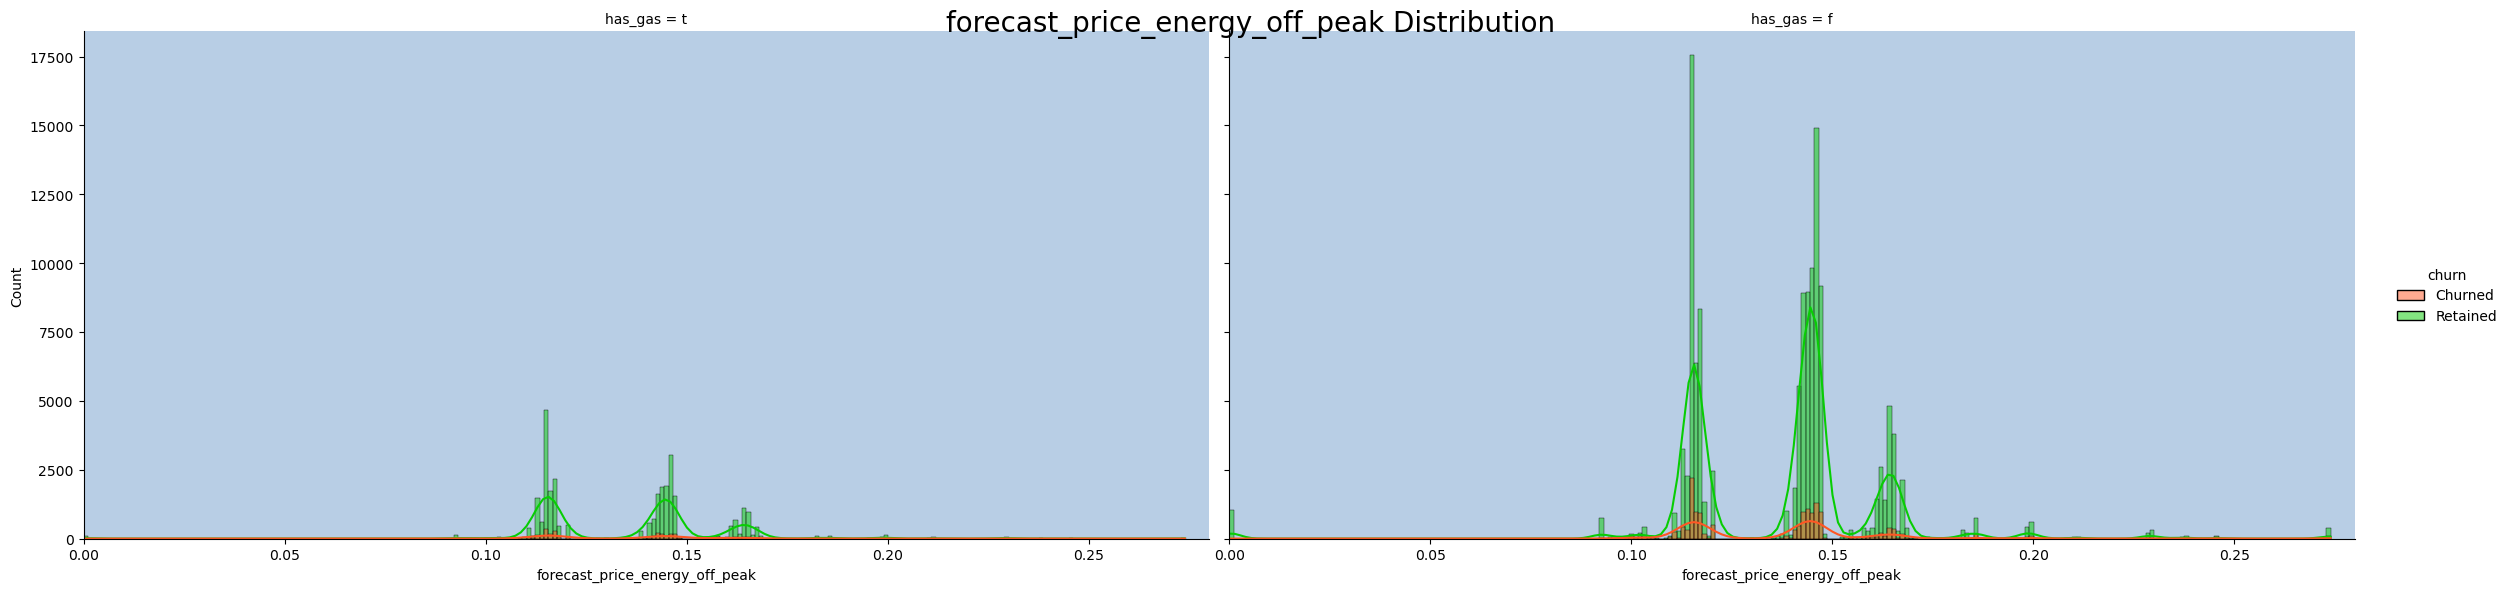

In [36]:
 displott(forecast, 'forecast_price_energy_off_peak',(0,0.28))

Forecasted energy price for 1st period of both type of Gas contract lies more in the range of 0.10 to 0.20 area and much lesser to intital point of the visual.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1300 with 0 Axes>

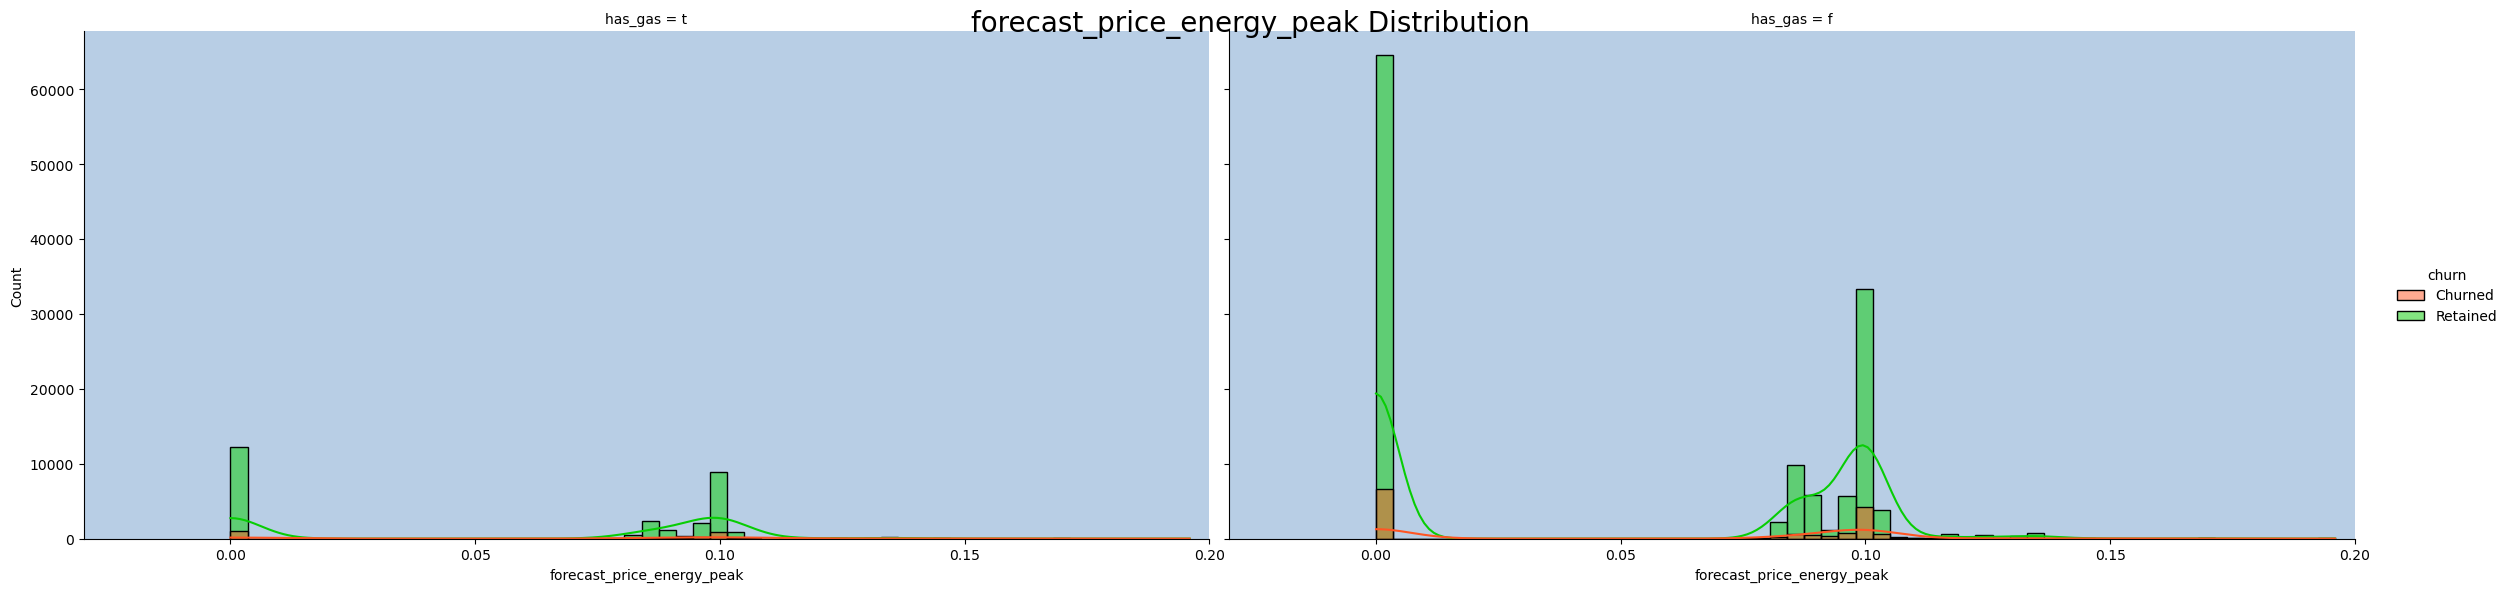

In [37]:
 displott(forecast, 'forecast_price_energy_peak',(-0.03,0.2))

For Forecasted energy price for 2nd period (peak) with Gas contract and without contract peaked simulataneously on two areas around 0 and 0.08 to .11 and churning chances are more high with the people who does not own the Gas contract.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1300 with 0 Axes>

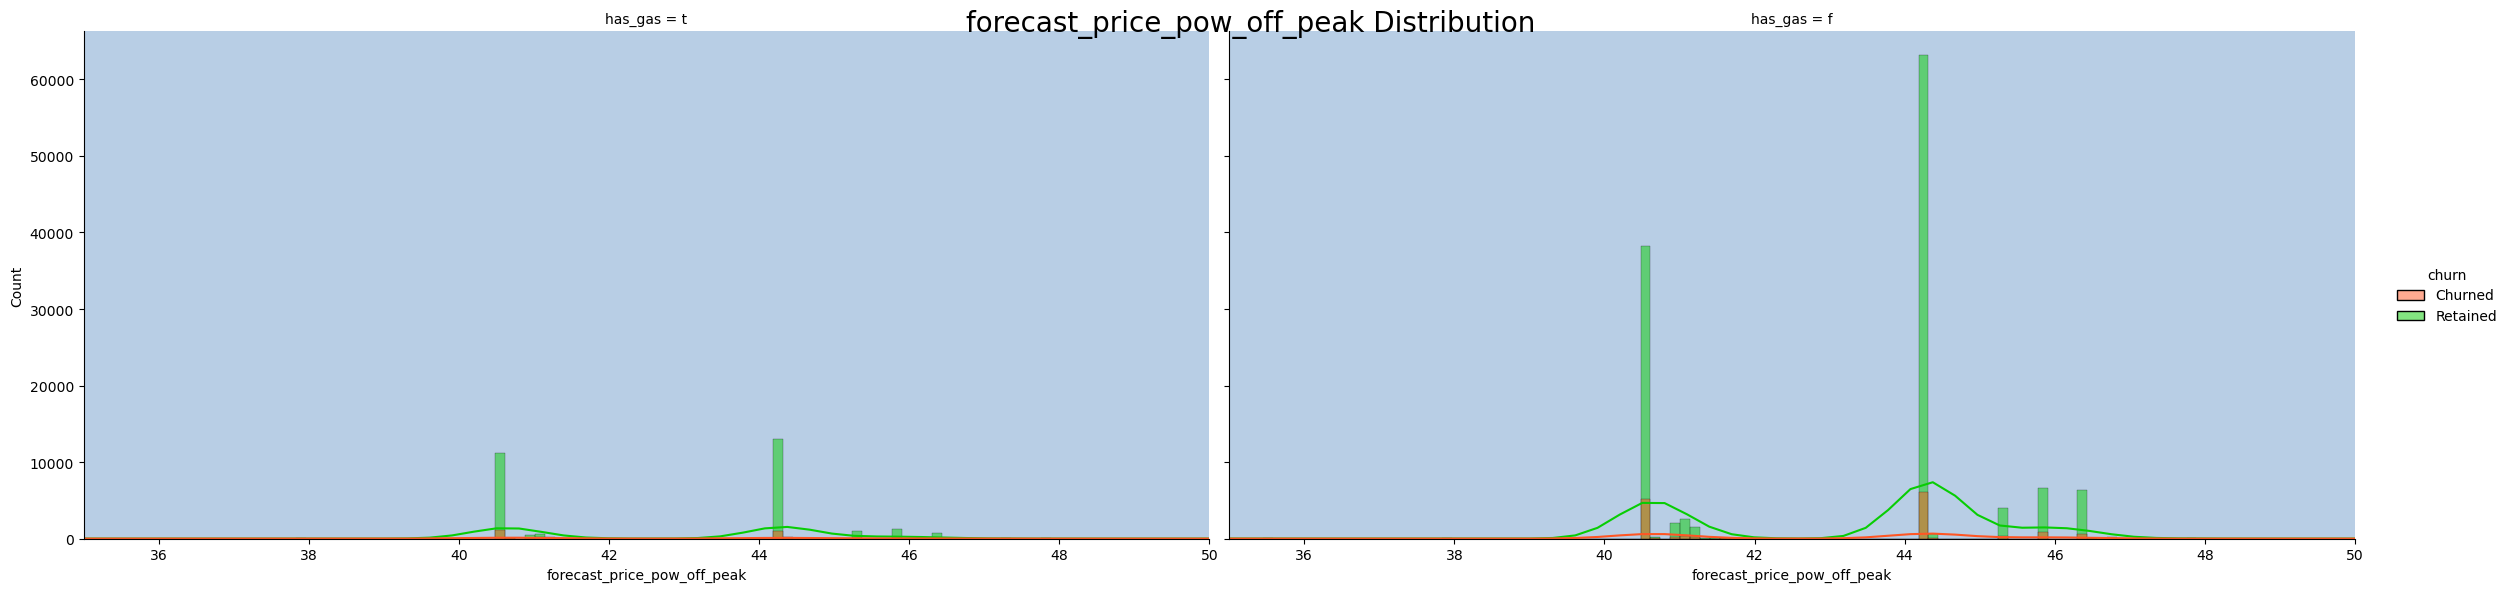

In [38]:
 displott(forecast, 'forecast_price_pow_off_peak',(35,50))

For Forecasted power price for 1st period (off peak) values are much less in both the ends.There is some sudden peakdness occurs between 40 and 46 both type of contracts.

/tmp/ipykernel_32/1006807505.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([f"{f1}"for f1 in axs[0].get_xticks()],fontsize=10)
/tmp/ipykernel_32/1006807505.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([f"{f10}"for f10 in axs[0].get_xticks()],fontsize=10)


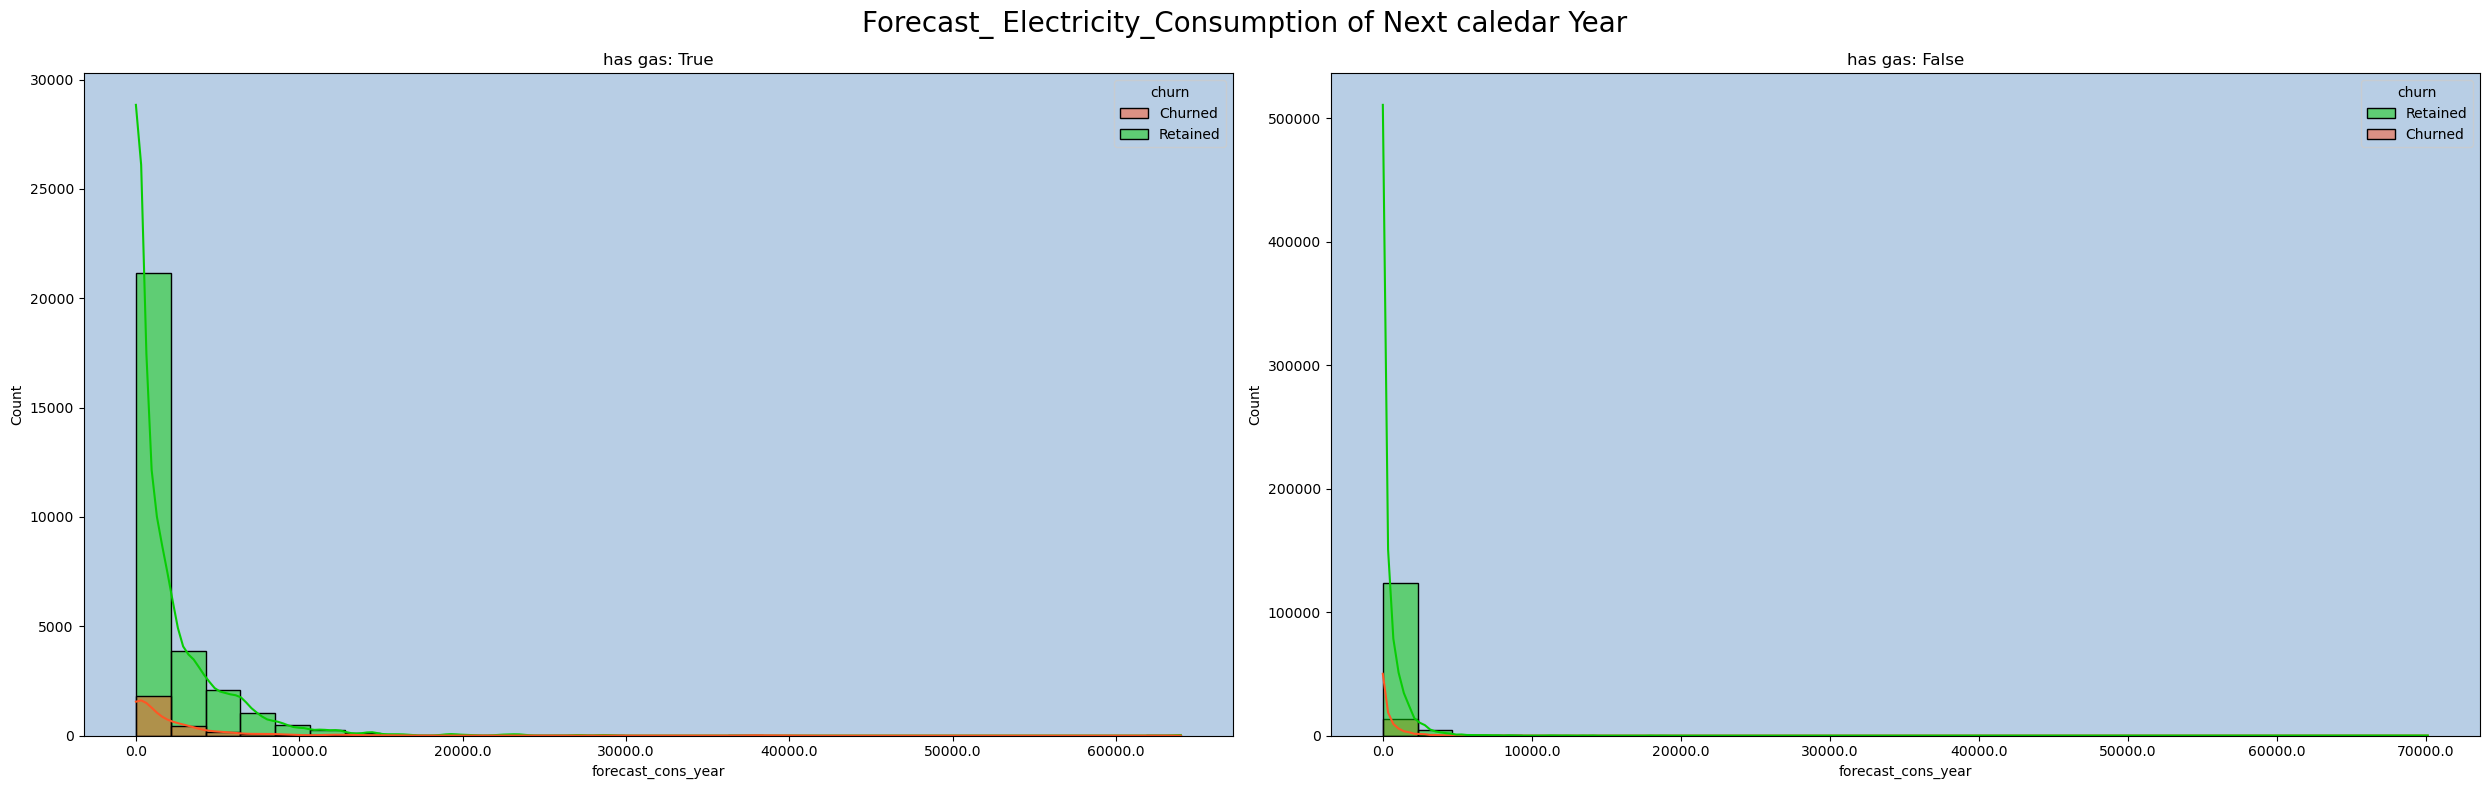

In [39]:
fig,axs=plt.subplots(1,2,figsize=(25,8))
c1,b1=np.histogram(forecast[forecast['has_gas']=='t']['forecast_cons_year'],30)
c2,b2=np.histogram(forecast[forecast['has_gas']=='f']['forecast_cons_year'],30)
plt.suptitle('Forecast_ Electricity_Consumption of Next caledar Year',fontsize=20)
sns.histplot(data=forecast[forecast['has_gas']=='t'],x='forecast_cons_year',hue='churn',ax=axs[0],kde=True,bins=b1,palette=[(1, 0.337, 0.141),(0.031, 0.803, 0.015)])
axs[0].set_xticklabels([f"{f1}"for f1 in axs[0].get_xticks()],fontsize=10)
axs[0].set_title('has gas: True')

sns.histplot(data=forecast[forecast['has_gas']=='f'],x='forecast_cons_year',hue='churn',ax=axs[1],kde=True,bins=b2,palette=[(0.031, 0.803, 0.015),(1, 0.337, 0.141)])
axs[1].set_xticklabels([f"{f10}"for f10 in axs[0].get_xticks()],fontsize=10)
axs[1].set_title('has gas: False')
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

For the Forecasted Electricity consumption of next calendar year people will consumes much between 0 to 200 and churning rate will be high with people's who owns the Gas contract compared to who does not own the contract

In [40]:
#contract type
contract=df[['id','has_gas','churn']]
c=contract.groupby(['churn','has_gas'])['id'].count().unstack()
c.index=c.index.map({0:'Retained',1:'Churned'})
for i in ['f','t']:
  c[f"{i}%"]=c[i]/((c['f']+c['t']))*100
c.T

churn,Retained,Churned
has_gas,,
f,128965.000000,14399.000000
t,29181.000000,2604.000000
f%,81.548063,84.685056
t%,18.451937,15.314944


/tmp/ipykernel_32/1915274806.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f"{int(y)}%" for y in plt.gca().get_yticks()])


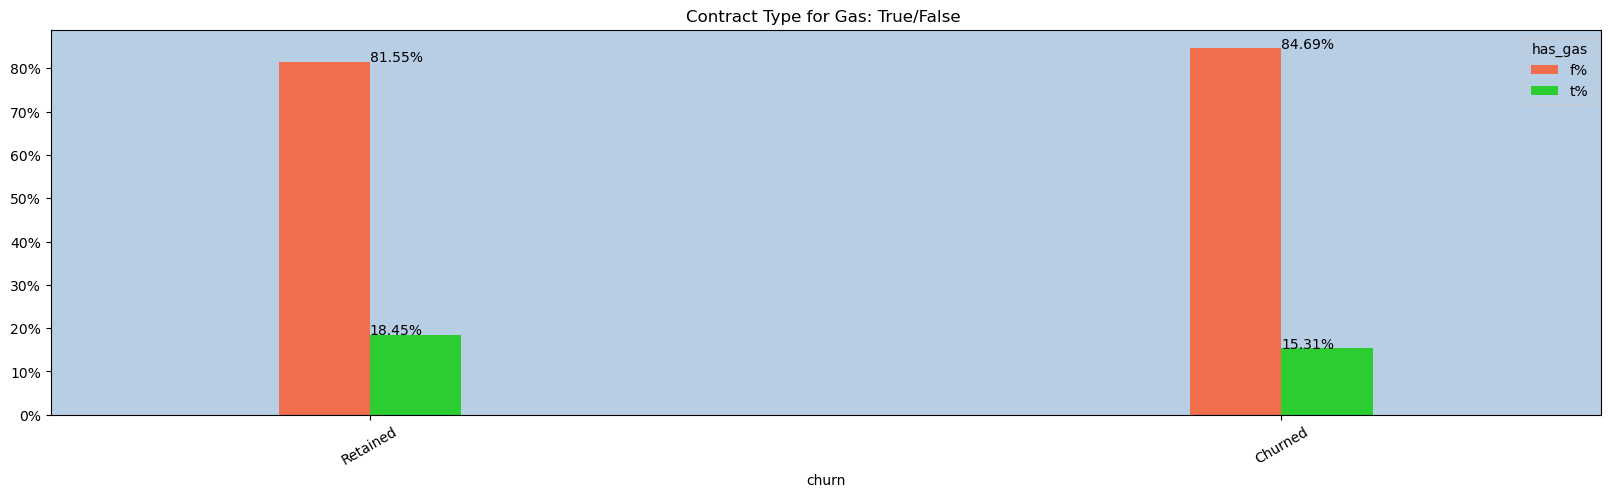

In [41]:
c=c[['f%','t%']]
ax=c.plot(kind='bar',color=[(1, 0.337, 0.141),(0.031, 0.803, 0.015)],alpha=0.8,figsize=(20,5),width=0.2)
for i in c.columns:
  for index,value in enumerate(c[i]):
    plt.text(index,value,f"{value:.2f}%")
plt.xticks(rotation=30)
plt.title('Contract Type for Gas: True/False ')
plt.gca().set_yticklabels([f"{int(y)}%" for y in plt.gca().get_yticks()])
plt.show()

the comparison between the owning the Gas contract:
   * People who does not own the contract will be retained around 82% and who own the contract  likely to be retained 18%

   * People who does not own the contract will be churned around 85% and who own the contract  likely to be churned 15%

In [42]:
#margins

margins=df[['id','margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'churn']]
margins.churn=margins.churn.map({1:'Churned',0:'Retained'})
margins.head()

/tmp/ipykernel_32/3147618325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  margins.churn=margins.churn.map({1:'Churned',0:'Retained'})


,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin,churn
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,Churned
1,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,Churned
2,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,Churned
3,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,Churned
4,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,Churned


In [43]:
def distribution(dataframe,col,lim):
  plt.figure(figsize=(20,6))
  sns.boxplot(data=dataframe,x=col,y=dataframe['churn'],
              showmeans=True,meanprops={'marker':'*','markerfacecolor':'Red','markeredgecolor':'yellow','markersize':'5'},
              palette=[(1, 0.337, 0.141),(0.031, 0.803, 0.015)])
  plt.title(f"{col} Boxplot ")
  plt.xlim(lim)
  plt.show()

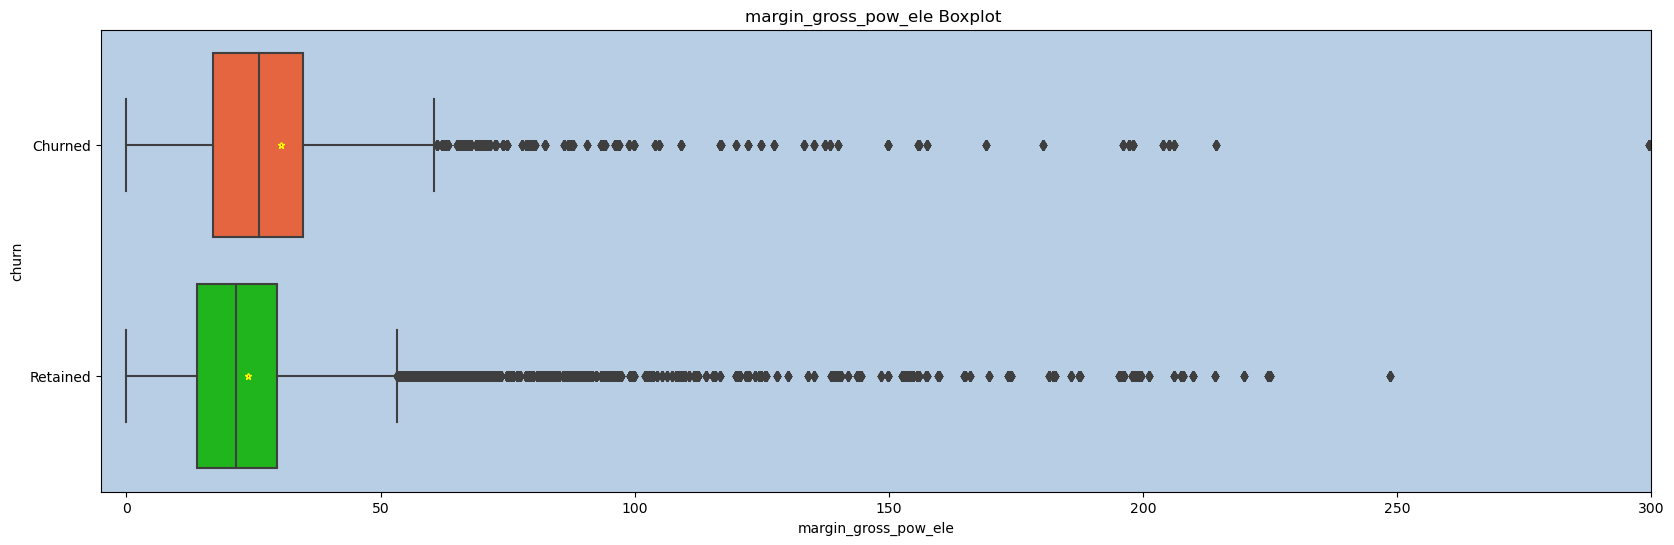

In [44]:
distribution(margins,'margin_gross_pow_ele',(-5,300))

The Gross margin on power subcription for both churned and Retained customer boxplot contains outliers in the data.

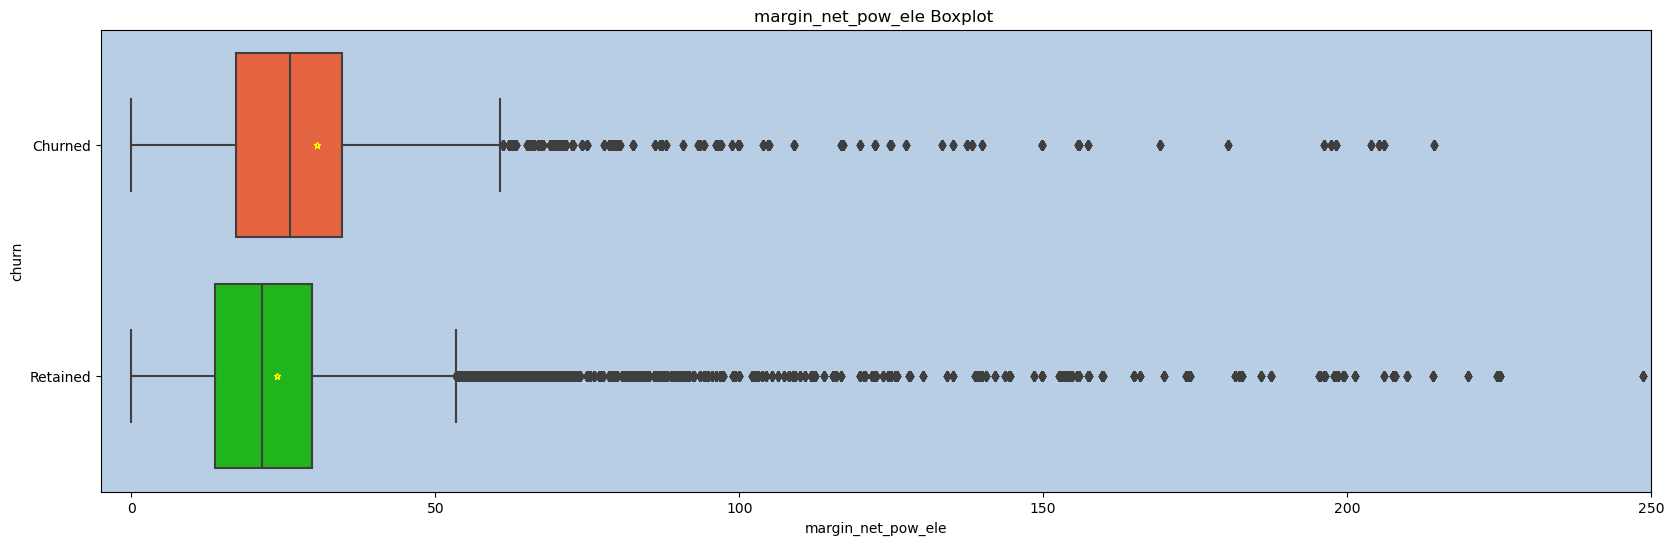

In [45]:
distribution(margins, 'margin_net_pow_ele',(-5,250))

Net margin on power subscription of the customers may like to churn a lot compared to retained ones and outliers are numerous in the data.

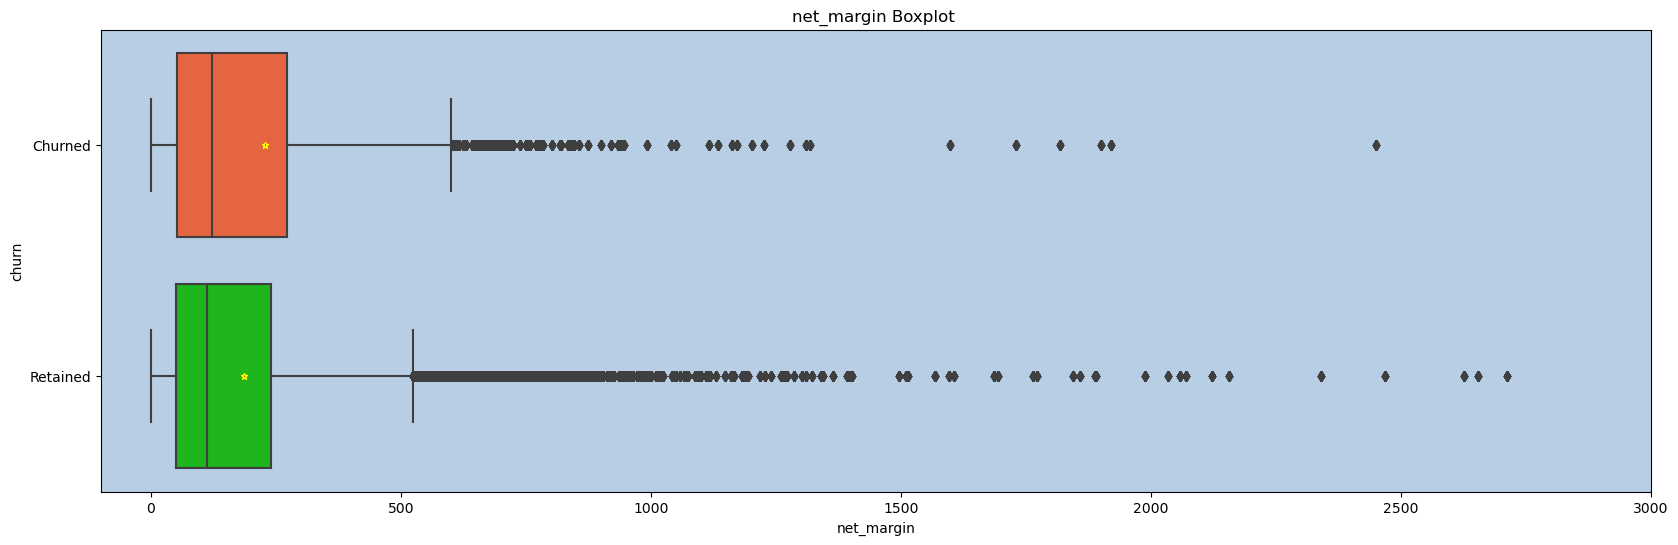

In [46]:
distribution(margins, 'net_margin',(-100,3000))

Total Net Margin for the customer churn is also high when compared to people will be less likey to pursue it.

In [47]:
#rest columns

rest=df[[ 'id', 'origin_up','nb_prod_act','num_years_antig','pow_max', 'churn']]
rest['churn']=rest['churn'].replace({1:'Churned',0:"Retained"})
rest.head()

/tmp/ipykernel_32/751089983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest['churn']=rest['churn'].replace({1:'Churned',0:"Retained"})


,id,origin_up,nb_prod_act,num_years_antig,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,lxidpiddsbxsbosboudacockeimpuepw,2,3,43.648,Churned
1,24011ae4ebbe3035111d65fa7c15bc57,lxidpiddsbxsbosboudacockeimpuepw,2,3,43.648,Churned
2,24011ae4ebbe3035111d65fa7c15bc57,lxidpiddsbxsbosboudacockeimpuepw,2,3,43.648,Churned
3,24011ae4ebbe3035111d65fa7c15bc57,lxidpiddsbxsbosboudacockeimpuepw,2,3,43.648,Churned
4,24011ae4ebbe3035111d65fa7c15bc57,lxidpiddsbxsbosboudacockeimpuepw,2,3,43.648,Churned


In [48]:
m={}
for i in ['Retained','Churned']:
  meanvalue=rest[rest['churn']==i]['pow_max'].mean()
  stdevalue=rest[rest['churn']==i]['pow_max'].std()
  m[i]=meanvalue,stdevalue

m=pd.DataFrame(m).reset_index()

m['index']=m['index'].replace({0:'Mean',1:'Standard Deviation'})
m

,index,Retained,Churned
0,Mean,17.999910,19.390412
1,Standard Deviation,13.154539,16.617392


<function matplotlib.pyplot.show(close=None, block=None)>

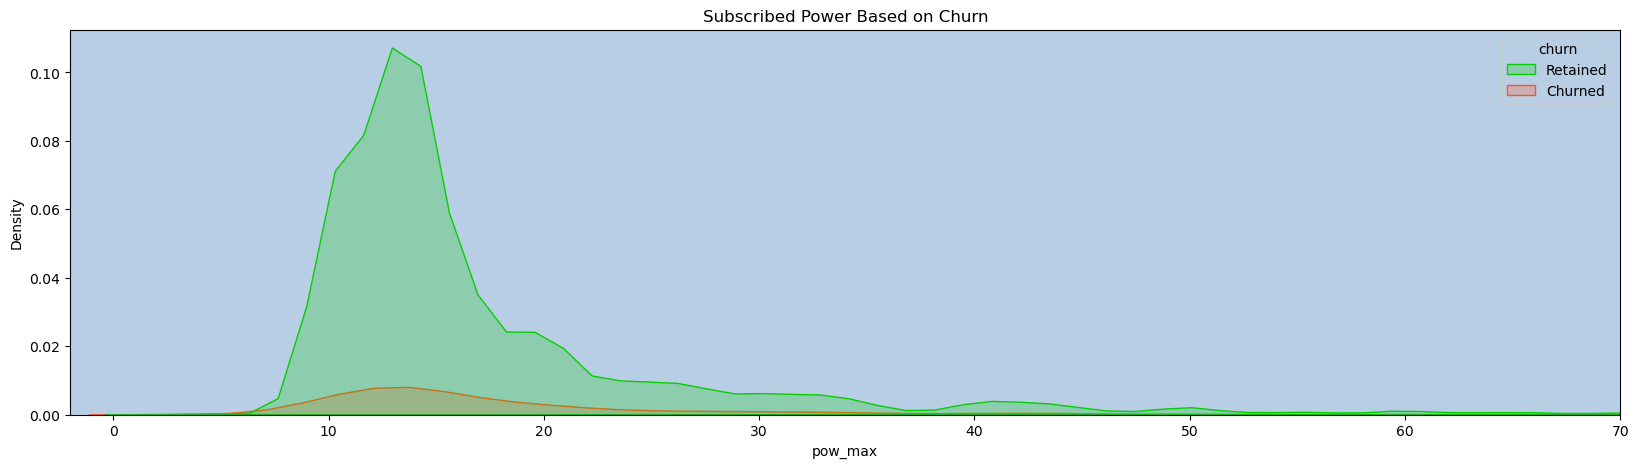

In [49]:
plt.figure(figsize=(20,5))
sns.kdeplot(data=rest, x='pow_max',hue='churn',hue_order=['Retained','Churned'],fill=True, palette=[(0.031, 0.803, 0.015),(1, 0.337, 0.141)])
plt.xlim(-2,70)
plt.title('Subscribed Power Based on Churn')
plt.show


* Subscribed Power people Retained are higher rate and the distribution plays around the mean of 18 and varies around standard deviation around 13 and right skewed in nature ie, more number of people using the power around 8 to 23.

* For the Churned pople of subscribed power are having the curve nature of platykurtic nature and curve varies around the mean of 19 and standard deviation of 16

In [50]:
def grps(dataframe,cols,slasher):
  d=dataframe.groupby([*cols])[slasher].count().unstack()
  if any(d.isna()):
    d.fillna(0,inplace=True)

    for i in ['Churned','Retained']:
      d[f"{i}%"]=d[i]/(d['Churned']+d['Retained'])*100
    else:
       for i in ['Churned','Retained']:
        d[f"{i}%"]=d[i]/(d['Churned']+d['Retained'])*100
    d1=d[['Churned%','Retained%']]
  return d1,d

In [51]:
#bar graph function (dataframe+col)
def bars(dataframe, o,t):
    dataframe[['Churned%', 'Retained%']].plot(kind='bar', stacked=False, color=[(1, 0.337, 0.141), (0.031, 0.803, 0.015)], figsize=(20, 7))
    for index, val in enumerate(dataframe['Retained%']):
        plt.text(index, val, f"{val:.2f}%", ha='left', va='bottom')
    for index1, val1 in enumerate(dataframe['Churned%']):
        plt.text(index1, val1, f"{val1:.2f}%", ha='left', va='top')
    plt.xticks(rotation=50,fontsize=12)
    plt.title(f'({t:<})  Churn Analysis')
    plt.xlabel(f"{o}")
    plt.tight_layout()
    plt.show()


In [52]:
nbprod,n_=grps(rest,['nb_prod_act','churn'],'id')
n_

churn,Churned,Retained,Churned%,Retained%
nb_prod_act,,,,
1,13669.0,123415.0,9.971258,90.028742
2,2494.0,26816.0,8.509041,91.490959
3,624.0,5651.0,9.944223,90.055777
4,180.0,1616.0,10.022272,89.977728
5,36.0,336.0,9.677419,90.322581
6,0.0,96.0,0.000000,100.000000
8,0.0,48.0,0.000000,100.000000
9,0.0,132.0,0.000000,100.000000
10,0.0,24.0,0.000000,100.000000


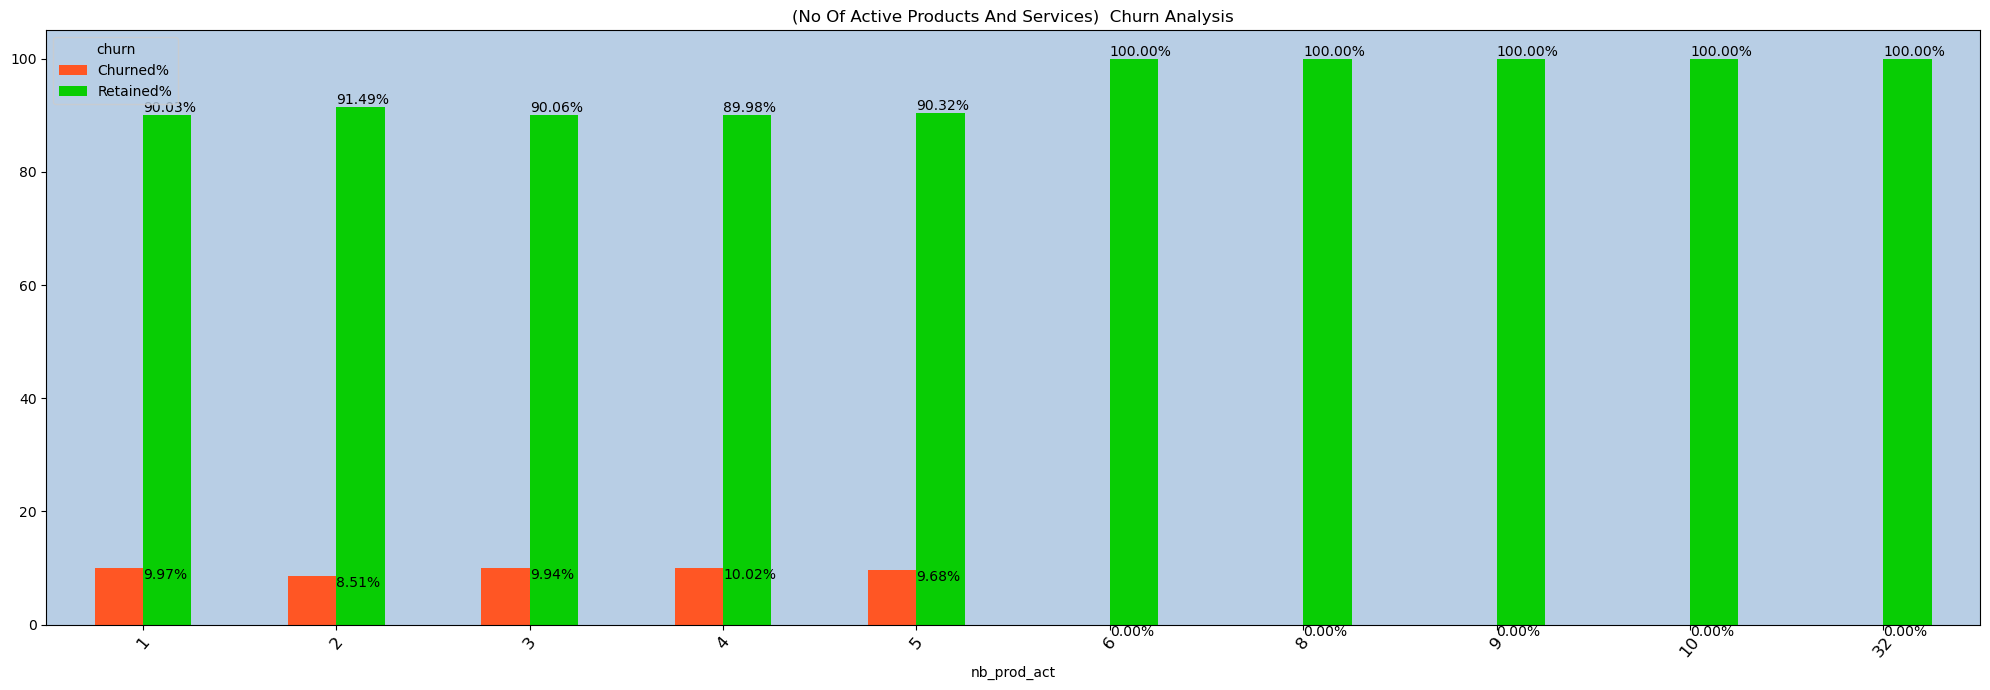

In [53]:
bars(nbprod,'nb_prod_act','No Of Active Products And Services')

In Number of active products and services only the products 1,2,3,4 and 5 contains the people with churned behaviour and other products have 100% retention rate.

In [54]:
origin,o_=grps(rest,['origin_up','churn'],'id')
o_

churn,Churned,Retained,Churned%,Retained%
origin_up,,,,
MISSING,48.0,719.0,6.258149,93.741851
ewxeelcelemmiwuafmddpobolfuxioce,0.0,12.0,0.000000,100.000000
kamkkxfxxuwbdslkwifmmcsiusiuosws,3093.0,48410.0,6.005475,93.994525
ldkssxwpmemidmecebumciepifcamkci,3163.0,34594.0,8.377255,91.622745
lxidpiddsbxsbosboudacockeimpuepw,10699.0,74387.0,12.574337,87.425663
usapbepcfoloekilkwsdiboslwaxobdp,0.0,24.0,0.000000,100.000000


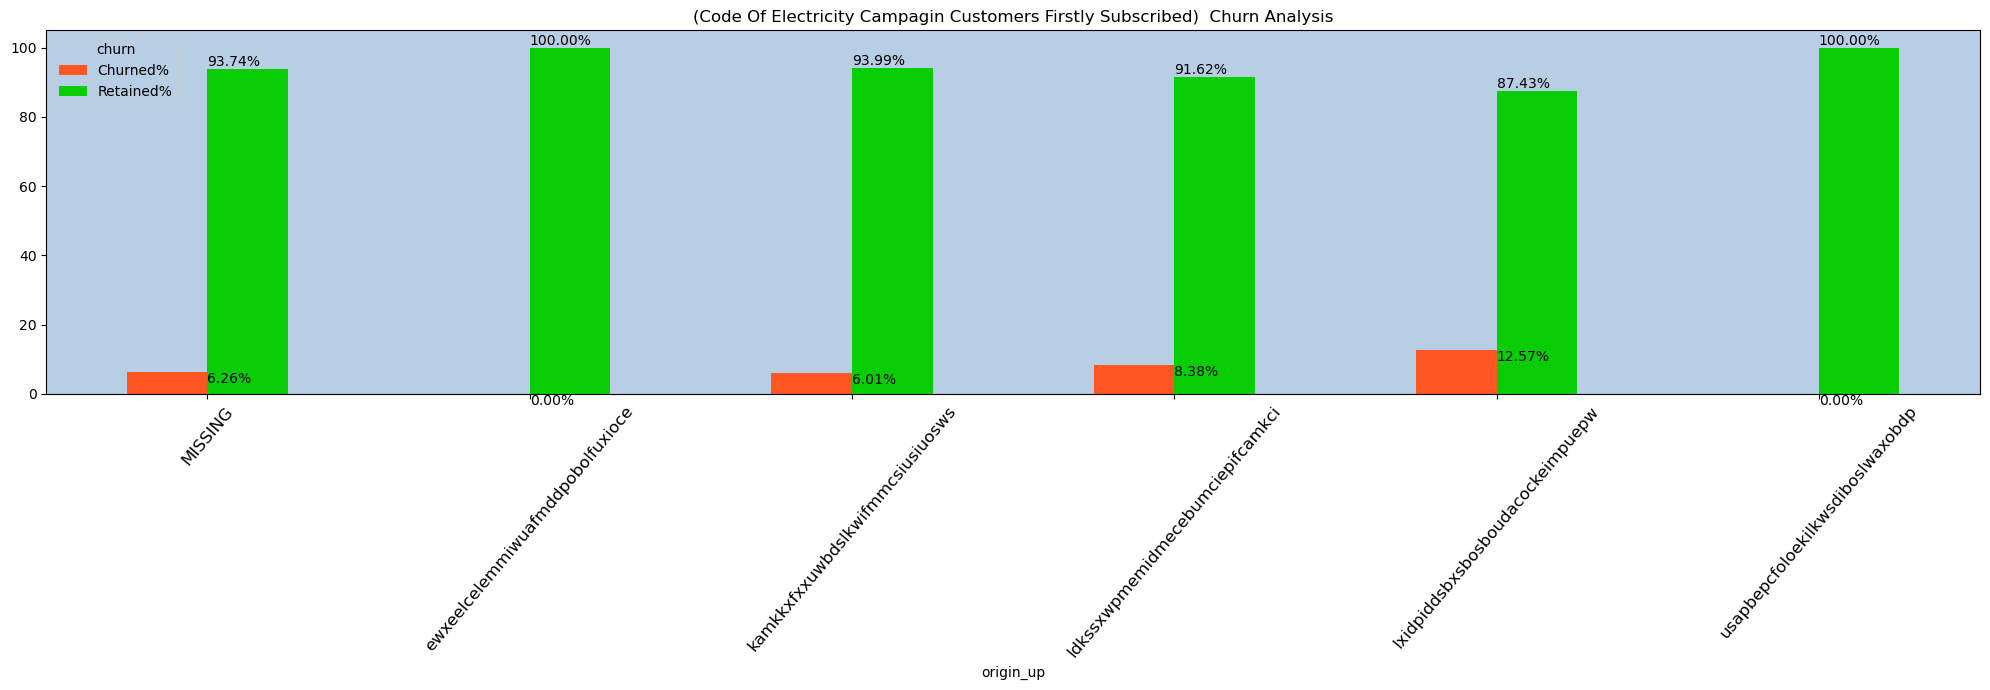

In [55]:
bars(origin,'origin_up','Code Of Electricity Campagin Customers Firstly Subscribed')

In code of the electricity campaign the customer first subscribed  only two id's have the 100% retention rate  and other have churned history. And Missing value is also here.

In [56]:
natig,na_=grps(rest,['num_years_antig','churn'],'id')
na_

churn,Churned,Retained,Churned%,Retained%
num_years_antig,,,,
1,0.0,12.0,0.000000,100.000000
2,36.0,96.0,27.272727,72.727273
3,3941.0,25221.0,13.514162,86.485838
4,5651.0,42084.0,11.838274,88.161726
5,2399.0,25391.0,8.632602,91.367398
6,4064.0,53141.0,7.104274,92.895726
7,504.0,5604.0,8.251473,91.748527
8,60.0,1174.0,4.862237,95.137763
9,12.0,1092.0,1.086957,98.913043


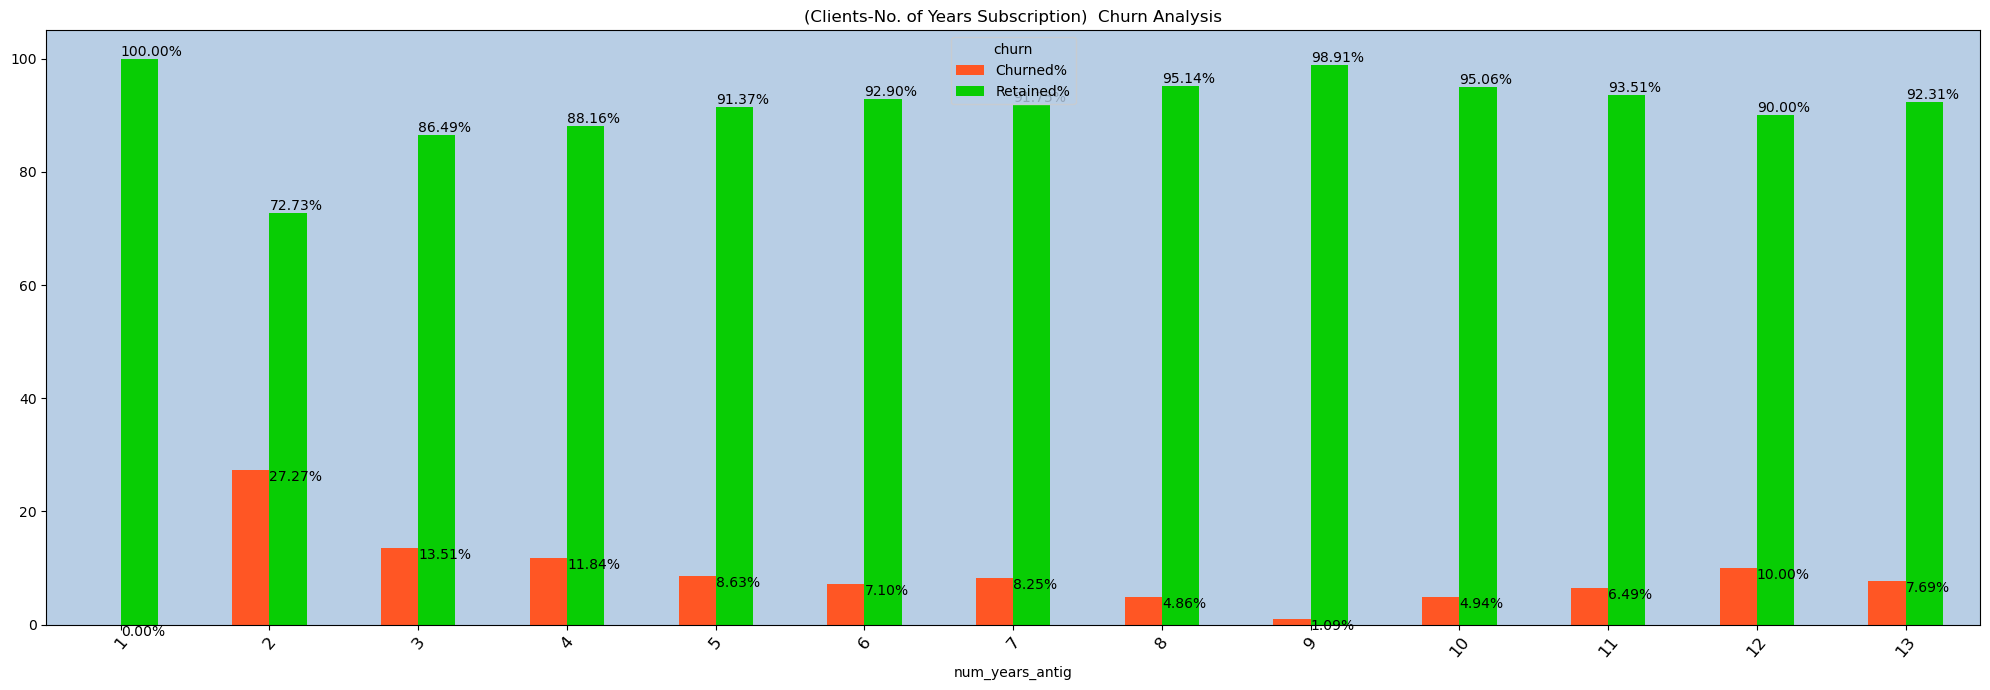

In [57]:
bars(natig,'num_years_antig','Clients-No. of Years Subscription')

People with 1 year of subscription have 100% retention rate. similar for the people who with 9 years of subcription. Higher churning rate with the people with 2 years of subscription. Some attention needed here to address this issue.

In [58]:
def displott(data, col):
  plt.figure(figsize=(20,5))
  sns.displot(data, x=col, kde=True,height=4,aspect=4,
              color=(0.956, 0.564, 0.949))
  plt.suptitle(f"{col} Distribution",fontsize=14)
  plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x500 with 0 Axes>

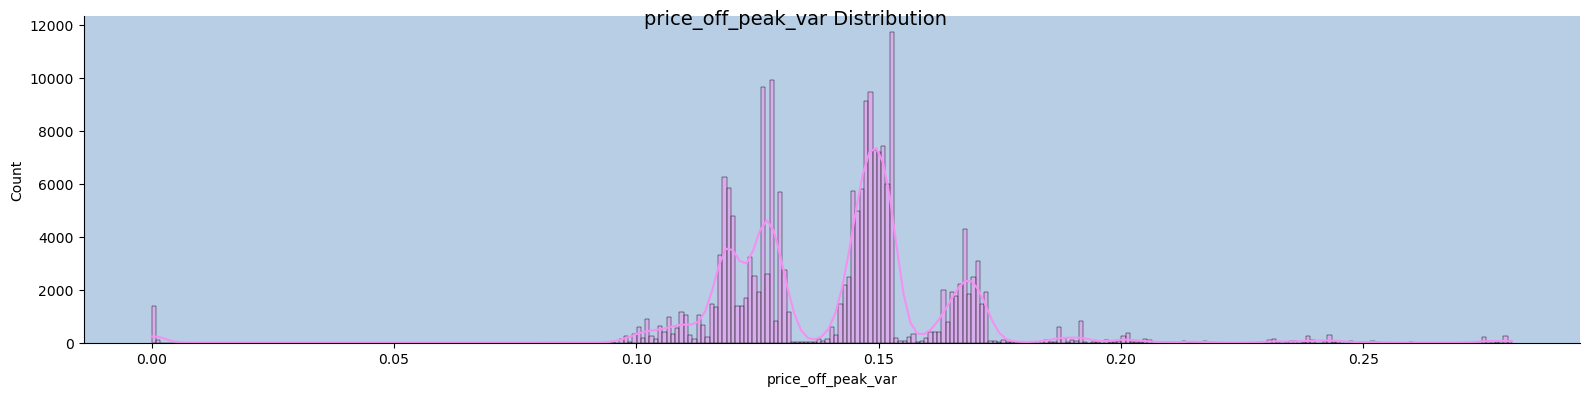

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x500 with 0 Axes>

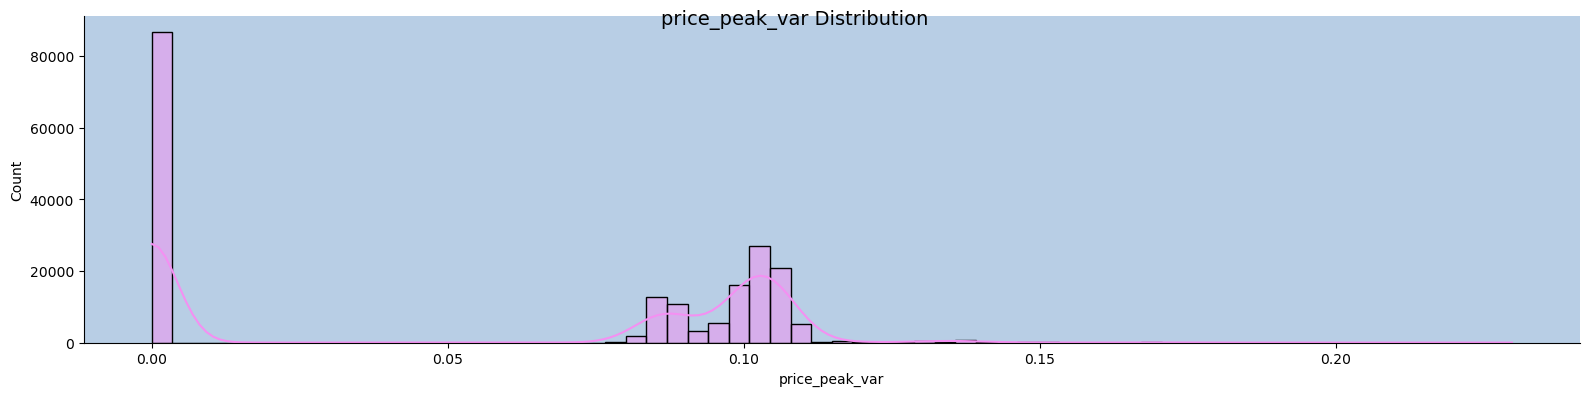

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x500 with 0 Axes>

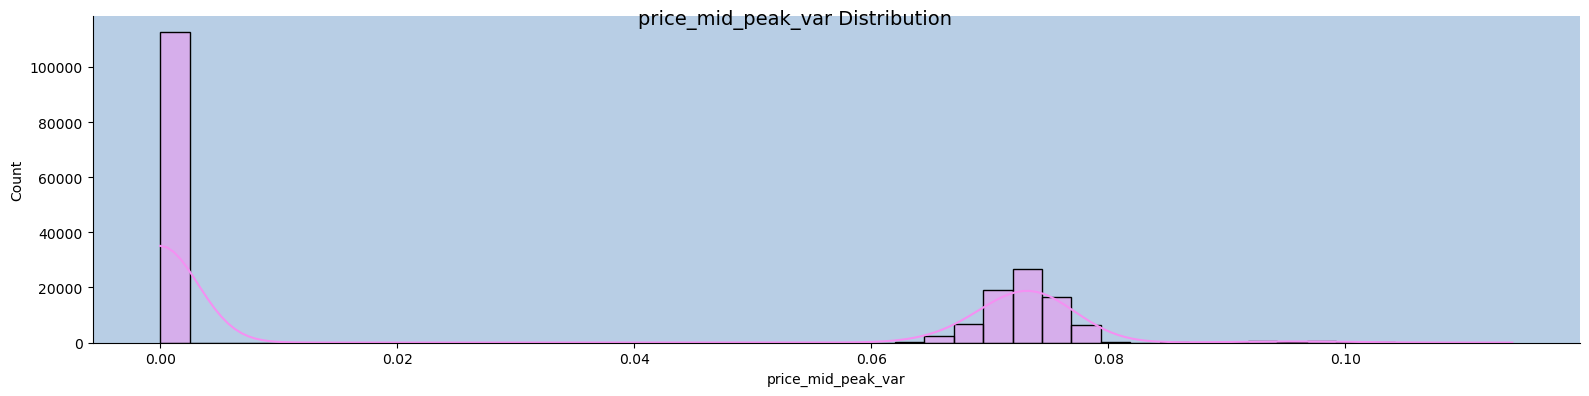

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x500 with 0 Axes>

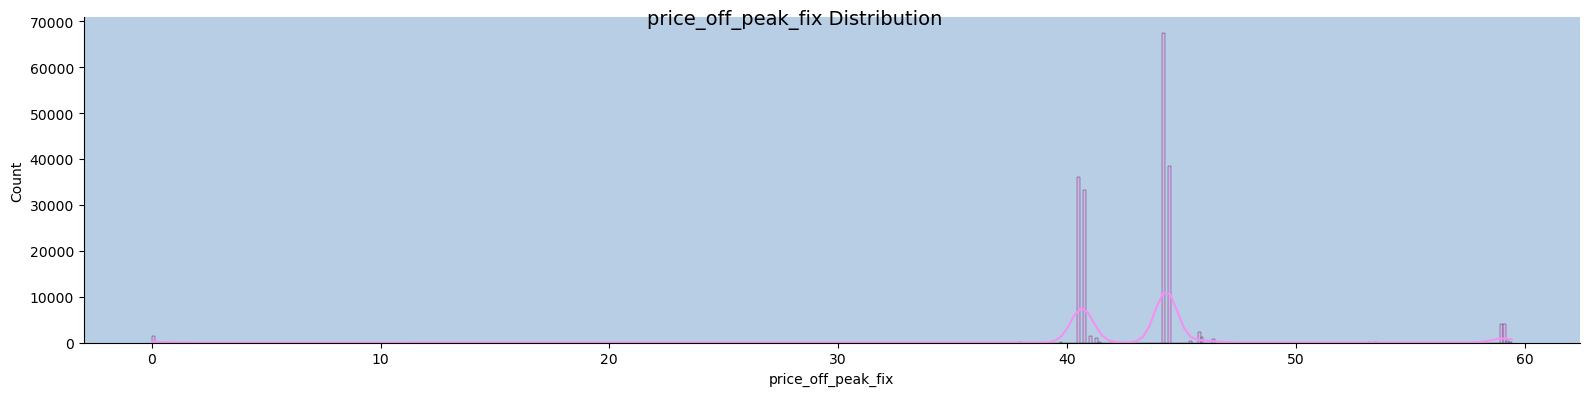

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x500 with 0 Axes>

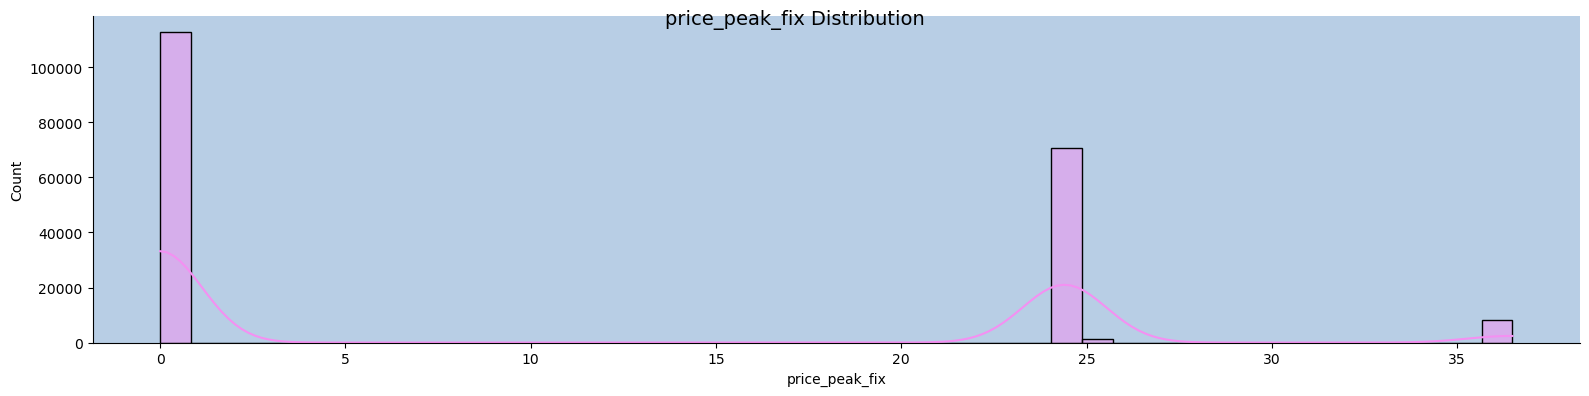

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x500 with 0 Axes>

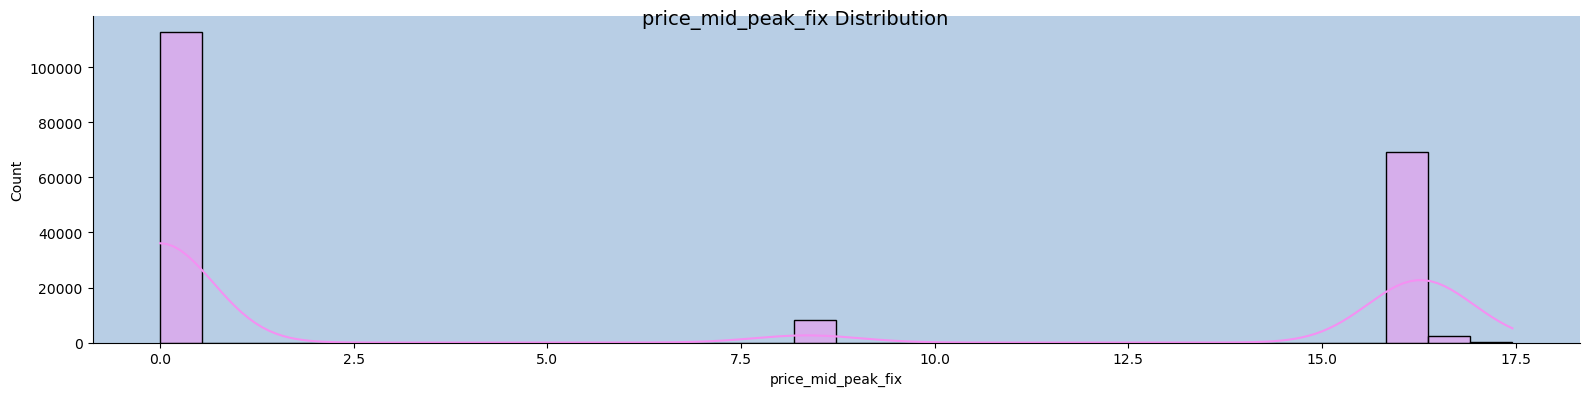

In [59]:
for i in [ 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']:
       displott(price,i)

# Price Sensitivity Analysis

PRICE SENSITIVITY or PRICE ELASTICITY:

* A simple measure  in which calculates how much the change in price of goods and services affect the willigness to buy the particular product or brand.

* Price sensitivity,Ps=      (% change in Quantity demand)/(% change in price of the brand or product )

* If Ps > 1: Demand is elastic (price-sensitive).
* If Ps = 1: Demand is unitary elastic.
* If 0 < Ps < 1: Demand is inelastic (less price-sensitive).
* If Ps = 0: Demand is perfectly inelastic (not price-sensitive).

Here, correlation to measure the relationship between price variations and churn rate for each customer segment.

In [60]:
print(f"Price Date Min: {price.price_date.min()} and Price Date Max: {price.price_date.max()}")

Price Date Min: 2015-01-01 and Price Date Max: 2015-12-01


In [61]:
year_var=price.groupby(['id','price_date']).mean().groupby('id').var().reset_index()
year_var.head()
for i in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
       year_var=year_var.rename(columns={i:f"y_{i}"})
year_var

,id,y_price_off_peak_var,y_price_peak_var,y_price_mid_peak_var,y_price_off_peak_fix,y_price_peak_fix,y_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000688,0.000422,1.563148e-04,3.062232e-02,0.043691,0.051094
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000004,0.000000,0.000000e+00,6.464760e-03,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000009,0.000006,1.857770e-05,7.211360e-03,0.002638,0.001196
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000021,0.000006,2.220744e-07,5.428835e-03,0.001954,0.000869


In [62]:

year_var['yv_price _off_peak p1']=year_var['y_price_off_peak_var']+year_var['y_price_off_peak_fix']
year_var['yv_price_peak p2']=year_var['y_price_peak_var']+year_var['y_price_peak_fix']
year_var['yv_price_midpeak p3']=year_var['y_price_mid_peak_var']+year_var['y_price_mid_peak_fix']

year_var

,id,y_price_off_peak_var,y_price_peak_var,y_price_mid_peak_var,y_price_off_peak_fix,y_price_peak_fix,y_price_mid_peak_fix,yv_price _off_peak p1,yv_price_peak p2,yv_price_midpeak p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000688,0.000422,1.563148e-04,3.062232e-02,0.043691,0.051094,0.031311,0.044114,0.051251
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000004,0.000000,0.000000e+00,6.464760e-03,0.000000,0.000000,0.006469,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000009,0.000006,1.857770e-05,7.211360e-03,0.002638,0.001196,0.007221,0.002644,0.001215
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000021,0.000006,2.220744e-07,5.428835e-03,0.001954,0.000869,0.005450,0.001960,0.000869


In [63]:
#6 months price sensitivity

_6mps=price[price['price_date']>'2015-06'].groupby(['id','price_date']).mean().groupby('id').var().reset_index()
_6mps.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,6.942857e-10,0.000000,0.000000,0.000000
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000020,0.000005,8.554557e-08,0.003791,0.001365,0.000607
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000


In [64]:
for i in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
       _6mps=_6mps.rename(columns={i:f"6_{i}"})
_6mps

,id,6_price_off_peak_var,6_price_peak_var,6_price_mid_peak_var,6_price_off_peak_fix,6_price_peak_fix,6_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,6.942857e-10,0.000000,0.000000,0.000000
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000020,0.000005,8.554557e-08,0.003791,0.001365,0.000607
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000384,0.000236,8.959353e-05,0.016040,0.022886,0.026764
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000004,0.000000,0.000000e+00,0.009030,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000016,0.000004,6.942857e-10,0.000000,0.000000,0.000000
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000019,0.000005,3.190963e-07,0.007583,0.002730,0.001214


In [65]:
_6mps['6mps_price_off_peak p1']= _6mps['6_price_off_peak_var']+_6mps['6_price_off_peak_fix']
_6mps['6mps_price_peak p2']= _6mps['6_price_peak_var']+_6mps['6_price_peak_fix']
_6mps['6mps_price_mid_peak p3']=_6mps['6_price_mid_peak_fix']+_6mps['6_price_mid_peak_var']
_6mps

,id,6_price_off_peak_var,6_price_peak_var,6_price_mid_peak_var,6_price_off_peak_fix,6_price_peak_fix,6_price_mid_peak_fix,6mps_price_off_peak p1,6mps_price_peak p2,6mps_price_mid_peak p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,6.942857e-10,0.000000,0.000000,0.000000,0.000016,0.000004,6.942857e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000020,0.000005,8.554557e-08,0.003791,0.001365,0.000607,0.003811,0.001370,6.068555e-04
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000384,0.000236,8.959353e-05,0.016040,0.022886,0.026764,0.016424,0.023122,2.685350e-02
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000004,0.000000,0.000000e+00,0.009030,0.000000,0.000000,0.009034,0.000000,0.000000e+00
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000016,0.000004,6.942857e-10,0.000000,0.000000,0.000000,0.000016,0.000004,6.942857e-10
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000019,0.000005,3.190963e-07,0.007583,0.002730,0.001214,0.007602,0.002735,1.213859e-03


In [66]:
s=pd.merge(year_var,_6mps,on='id')
s.head()

,id,y_price_off_peak_var,y_price_peak_var,y_price_mid_peak_var,y_price_off_peak_fix,y_price_peak_fix,y_price_mid_peak_fix,yv_price _off_peak p1,yv_price_peak p2,yv_price_midpeak p3,6_price_off_peak_var,6_price_peak_var,6_price_mid_peak_var,6_price_off_peak_fix,6_price_peak_fix,6_price_mid_peak_fix,6mps_price_off_peak p1,6mps_price_peak p2,6mps_price_mid_peak p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000016,0.000004,6.942857e-10,0.000000,0.000000,0.000000,0.000016,0.000004,6.942857e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000020,0.000005,8.554557e-08,0.003791,0.001365,0.000607,0.003811,0.001370,6.068555e-04
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000005,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000e+00


In [67]:
price_analysis=pd.merge(s,df[['id','churn']],on='id')
price_analysis.head(4)

,id,y_price_off_peak_var,y_price_peak_var,y_price_mid_peak_var,y_price_off_peak_fix,y_price_peak_fix,y_price_mid_peak_fix,yv_price _off_peak p1,yv_price_peak p2,yv_price_midpeak p3,6_price_off_peak_var,6_price_peak_var,6_price_mid_peak_var,6_price_off_peak_fix,6_price_peak_fix,6_price_mid_peak_fix,6mps_price_off_peak p1,6mps_price_peak p2,6mps_price_mid_peak p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,0.004021,0.001448,0.000643,0.004037,0.001452,0.000645,0.000016,0.000004,6.942857e-10,0.0,0.0,0.0,0.000016,0.000004,6.942857e-10,0
1,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,0.004021,0.001448,0.000643,0.004037,0.001452,0.000645,0.000016,0.000004,6.942857e-10,0.0,0.0,0.0,0.000016,0.000004,6.942857e-10,0
2,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,0.004021,0.001448,0.000643,0.004037,0.001452,0.000645,0.000016,0.000004,6.942857e-10,0.0,0.0,0.0,0.000016,0.000004,6.942857e-10,0
3,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,0.004021,0.001448,0.000643,0.004037,0.001452,0.000645,0.000016,0.000004,6.942857e-10,0.0,0.0,0.0,0.000016,0.000004,6.942857e-10,0


In [68]:
c=price_analysis.corr(method='pearson')

/tmp/ipykernel_32/2946853885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=price_analysis.corr(method='pearson')


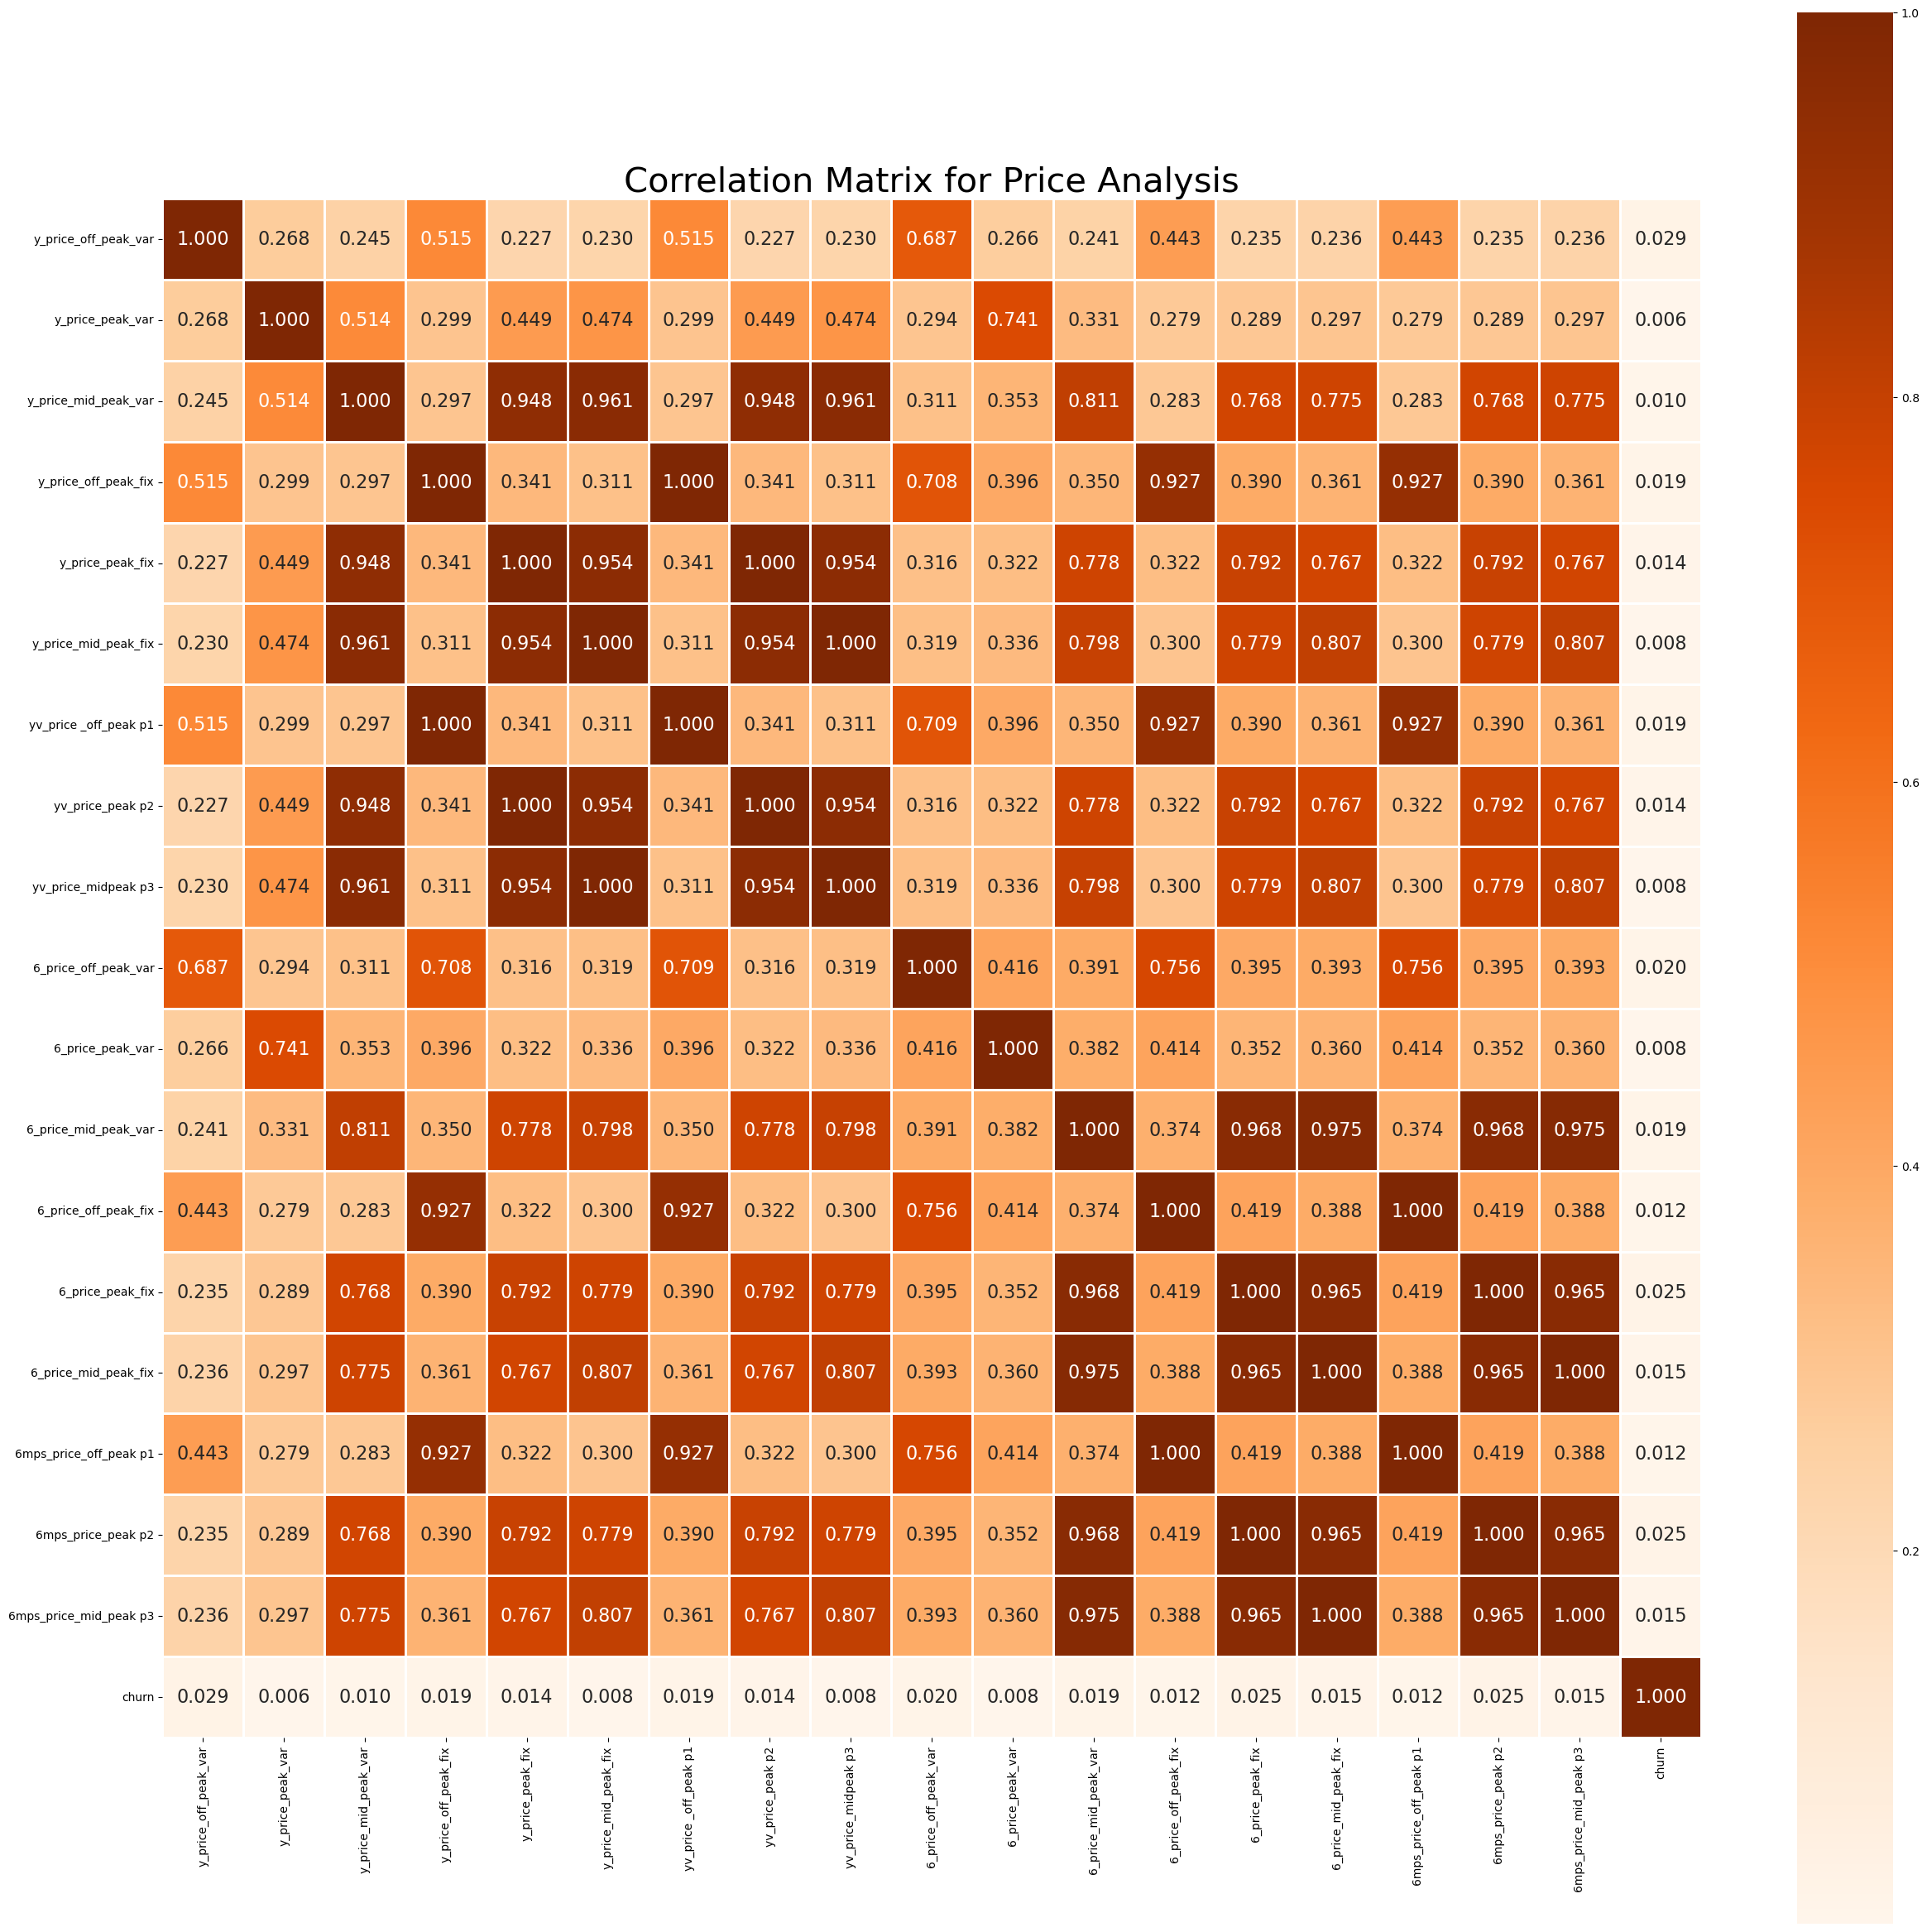

In [79]:
plt.figure(figsize=(30,30))
sns.heatmap(c,annot=True,fmt='.3f',square=True,cmap='Oranges',linewidths=2,annot_kws={"size": 16})
plt.title('Correlation Matrix for Price Analysis',fontsize=30)
plt.show()

For price sensitive analysis using correlation method churning is likely to be have weak relationship with the price sensitivity.
And Higher inter correlation found between the price sensitivity features.

In [ ]:
task2=pd.merge(client.drop(columns='churn'),price_analysis,on='id')
task2.to_excel('task2.xlsx')

FINDINGS:

* Most of the features are right skewed and followed by heavly tailed distributions.
* Dataset contains more number of outliers
* People who dont own the Gas contract Churned a lot when compared to the people who own the Gas contract.
* Forecasted value of current discount for the pople own Gas contract have the much less churn rate.
* comparison between the owning the Gas contract:
    @ People who does not own the contract will be retained around 82% and who own the contract likely to be retained 18%

    @ People who does not own the contract will be churned around 85% and who own the contract likely to be churned 15%.
* Around 10% people are like to be churned and 90% will be retained.
    
* Number of active products and services only the products 1,2,3,4 and 5 contains the people with churned behaviour and other products have 100% retention rate.

* People with 1 year of subscription have 100% retention rate. similar for the people who with 9 years of subcription. Higher churning rate with the people with 2 years of subscription. Some attention needed here to address this issue.

* price sensitive analysis using correlation method churning is likely to be have weak relationship with the price sensitivity. And Higher inter correlation found between the price sensitivity features


